<a href="https://colab.research.google.com/github/fontanads/machine_learning/blob/master/pytorch_labs/Computer_Vision_Intro_com_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Visão Computacional com PyTorch: Parte 1

Tutorial elaborado por [Bruno Fontana da Silva](https://github.com/fontanads). 

_Disclaimer_: os exemplos das unidades I e II, de redes convolucionais com PyTorch, foram inspirados na Seção "CNN - Convolutional Neural Networks" do Curso "[PyTorch for Deep Learning with Python Bootcamp](https://www.udemy.com/course/pytorch-for-deep-learning-with-python-bootcamp/)", ministrado por Jose Portilla e disponível na plataforma de cursos online Udemy.  Procurei diferenciar o conteúdo o máximo possível, acrescentando uma introdução mais básica de processamento de imagens digitais e aprofundando os exemplos, com análise e explicações mais detalhadas das etapas de processamento das redes neurais.  

Além disso, todo este tutorial foi planejado par ser executado pela plataforma do Google Colab, sendo necessário apenas uma conexão com a _internet_ para acessar os _datasets_, imagens externas e gifs. Preferencialmente, altere também o tipo de ambiente de execução do Colab para habilitar o uso de GPUs.

# Sumário
- [A.  Fundamentos Básicos de PyTorch](#A)
- [B.  Visão Computacional](#B)
- [C.  Fundamentos Básicos de Processamento Digital de Imagens](#C)
    - [C.1  Matriz de pixels e canais](#C1)
    - [C.2  Operações nos canais e máscaras](#C2)
    - [C.3  Kernels: filtros convolucionais](#C3)
    - [C.4  Operações (Max)-Pooling](#C4)
- [I. Redes Convolucionais com Torch Vision e Datasets Clássicos](#1)
    - [I.1  Formato $\left(m, \text{C}, \text{H}, \text{W} \right)$](#I1)
    - [I.2  Dataset MNIST no Torch Vision](#I2)
    - [I.3  Torch Batch Data-Loader](#I3)
    - [I.4  Camadas Conv2D e MaxPool](#I4)
    - [I.5  Criando o Modelo](#I5)
    - [I.6  Critério de Desempenho e Otimização](#I6)
    - [I.7  Treinando a rede](#I7)
    - [I.8  Testando a rede e analisando features](#I8)
    - [I.9  Dataset CIFAR-10: Classificando Imagens Coloridas](#I9) 
- [II.  Transfer Learning](#II)
    - [II.1  Carregando modelos pré-treinados do Torch Vision](#II1)
    - [II.2  Utilizando modelos pré-treinados](#II2)
    - [II.3  Modificando Modelos Pré-Treinados para usar Transfer Learning](#II3)
- [Bônus: os problemas das camadas densas no processamento de imagens](#Bonus)

Antes de iniciar o tutorial, vamos importar as principais bibliotecas que serão utilizadas.

In [1]:
from os import listdir
import random as rnd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
CUDA_flag = torch.cuda.is_available() # a flag to check if CUDA is available for GPU use

A variável booleana ``CUDA_flag`` será utilizada para identificarmos a disponibilidade de GPUs e rodar os códigos mais rapidamente nesses casos. Caso o ambiente não tenha suporte a GPUs, a variável retorna ``False``
e o código seguirá a execução com CPUs. 

Esses desvios condicionais serão inseridos nos momentos apropriados.

In [4]:
CUDA_flag

True

<a name="A"></a>
# Fundamentos Básicos de PyTorch

Neste tutorial, utilizaremos o PyTorch.  
Entretanto, não cobriremos uma introdução detalhada ao _framework_ e seus objetos.

Para uma introdução mais detalhada ao PyTorch, [estude aqui](https://github.com/fontanads/machine_learning/blob/master/pytorch_labs/Introdu%C3%A7%C3%A3o_ao_PyTorch_da_Regress%C3%A3o_Linear_%C3%A0_NLP_com_word_embeddings.ipynb):  
- a parte 1 (tensores) e 
- as partes 2, 3 e 4 (criação de modelos de rede neural).

<a name="B"></a>
# Visão Computacional

Embora algumas técnicas clássicas da área de processamento digital de imagens tenham sido desenvolvidas desde os anos 1960, a evolução tecnológica dos dispositivos eletrônicos sempre afetou positivamente a capacidade de implementação dessas técnicas em aplicações mais complexas.  

Dispositivos de armazenamento de dados mais baratos, câmeras fotográficas de alta resolução embutidas em dispositivos eletrônicos portateis e pessoais, processadores cada vez mais velozes integrados em chips miniaturizados e processadores dedicados ao processamento de funções gráficas são alguns exemplos de tecnologias que subsidiaram o avanço das aplicações de visão computacional desde o final do século passado até o presente momento.

Andew Ng, professor de Stanford, costuma dizer a seguinte frase:  
> "**_AI é a nova eletricidade_**",  

comparando a capacidade de revolução dos sistemas de inteligência artificial à reolução industrial decorrente da descoberta e do domínio da energia elétrica.

Certamente, os avanços nas aplicações com visão computacional são responsáveis pela onda recente de interesse na área de inteligência artificial.  

O ponto de origem do recente crescimento de pesquisas em aprendizagem de máquina e redes neurais profundas pode ser rastreado para o surgimento do modelo AlexNet, em 2012:

> _Alex Krizhevsky, Ilya Sutskever, and Geoffrey E Hinton. "**ImageNet Classification with
Deep Convolutional Neural Networks**". In: Advances in Neural Information Processing
Systems 25. Edited by F. Pereira et al. Curran Associates, Inc., 2012, pages 1097–1105. URL:
http://papers.nips.cc/paper/4824-imagenet-classification-with-deepconvolutional-neural-networks.pdf._



através do qual os autores venceram a competição "_The ImageNet Large Scale Visual Recognition Challenge (ILSVRC)_" utilizando uma arquitetura de redes neurais com sequências de **camadas convolucionais e funções de ativação ReLU**. As taxas de acerto de classificação da rede AlexNet foram muito superiores às técnicas competidoras (aproximadamente $84,7\%$ contra $73,8\%$ do segundo colocado), criando um marco histórico para os anos que seguiriam.

Desde então, as gigantes empresas de tecnologia como Google, Facebook e Microsoft têm investido intensivamente no desenvolvimento de soluções de inteligência artificial, muitas delas voltadas para (ou utilizando conjuntamente) aprendizagem de máquina em visão computacional.  

Dentre todas as diversas aplicações recentes de aprendizagem de máquina em visão computacional, podemos listar algumas:
- identificação biométrica de rostos (aplicando em bases de dados arbitrárias)
- detecção e rastreamento de objetos em vídeos (e suas aplicações para veículos autônomos)
- diagnóstico e análise de imagens médicas (classificação automática e detecção de "objetos")
- transformação de imagens com transferência de estilo (_neural style transfer_)
- geradores de novas imagens (por exemplo, rostos de seres humanos) através a aprendizagem de uma distribuição de dados.

**Neste tutorial, vamos introduzir as ferramentas básicas para o pré-processamento de imagens e o treinamento de modelos simples de _deep learning_ para classificação automática de imagens.**  

Utilizaremos o PyTorch como ferramenta principal.  
Além disso, também faremos uso de ferramentas e dados da biblioteca ``torchvision``.

<a name="C"></a>
# Fundamentos Básicos de Processamento Digital de Imagens

A visão computacional começou a se diferenciar do processamento digital de imagens pelo desejo de recuperar a estrutura tridimensional do ambiente através de imagens e usar essa informação como uma peça para compreensão completa da cena amostrada.  

A representação de uma cena através de uma imagem envolve diversos aspectos, como:
- a iluminação ambiente e os fenômenos de reflexão, difração e refração da luz
- efeitos de perspectiva e distância entre objetos
- fenômenos de óptica de lentes.

Portanto, precisamos iniciar compreendendo que a imagem digital que visualizamos em uma tela de duas dimensões é composta por um conjunto de projeções luminosas de um ambiente tridimensional.  

Considere o simples exemplo de uma imagem fotografada com uma lente comum e compare com a mesma cena fotografada com uma lente "olho-de-peixe":

<img src="https://idigitaldarwin.files.wordpress.com/2011/06/fisheye-vs-conventional.jpg" alt="Comparação de imagens capturadas por diferentes lentes." width="350px"/>

e note que há uma distorção muito grande causada pela lente, embora a cena representada seja a mesma.  

Durante o processo de captura, alguns processamentos da luz são realizados pelo próprio dispositivo até que o sinal (a imagem da cena observada) é convertido em sua versão digital e armazenado em um arquivo. Essa versão ainda é um formato bruto, normalmente denominado [**RAW**](https://en.wikipedia.org/wiki/Raw_image_format), onde houve o mínimo de processsamento sobre a cena capturada.  

Para acessar a imagem usando um _software_ visualizador de imagens ou realizar algum tipo de impressão, é necessário converter a imagem RAW para um formato [**_Raster_ ou _Bitmap_**](https://en.wikipedia.org/wiki/Raster_graphics). Esse formato é uma representação (geralmente) retangular e formado por uma "grade" de pixels. 



<a name="C1"></a>
## Matriz de pixels e canais

Embora existam diferentes algoritmos de compressão para armazenar as imagens _bitmap_, sua representação matemática "descomprimida" é um conjunto de $\text{C}$ canais, cada um composto por uma matriz de pixels  ($\text{H} \times \text{W}$), sendo o número de linhas $H$ correspondente à _altura_ da imagem e o número de colunas $W$ correspondente à largura da imagem. As matrizes de todos os canais são idênticas em tamanho, e cada elemento corresponde a um pixel.

Um dos padrões mais comuns de representação é utilizando três canais de cores: vermelho (_red_, R), verde (_green_, G) e azul (_blue_, B).
<img src="https://www.researchgate.net/profile/Bhupendra_Pratap_Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png" alt="Representação RGB." width="300px"/>


Para visualizar uma imagem de formato **RGB** no ``matplotlib``, armazenamos a imagem usando um objeto com dimensões que seguem a convenção $\left(\text{H}, \text{W}, \text{C} \right)$. Os pixels correspondentes de cada canal serão mesclados para formar a resposta de luz da imagem naquele ponto. Quando a imagem possuir um único canal, será representada pelo contraste de intensidade entre os pixels (normalmente representado em escala de cinza).

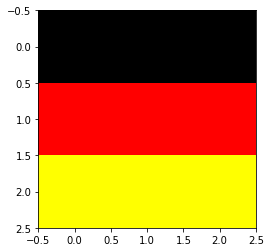

In [5]:
# exemplo de uma imagem RGB de 3x3 pixels construída arbitrariamente
# vou escrever os pixels explicitamente para evidenciar a composição e facilitar outros testes

# Canal Vermelho
red_channel_matrix   = [[0,0,0], 
                        [255, 255, 255], 
                        [255,255,255]]
# Canal Verde
green_channel_matrix = [[0,0,0], 
                        [0,0,0], 
                        [255,255,255]]

# Canal Azul
blue_channel_matrix  = [[0,0,0], 
                        [0,0,0], 
                        [0,0,0] ]

# concatena as matrizes em relação à terceira dimensão (formando canais de cores)
sample_image = np.stack([red_channel_matrix, green_channel_matrix, blue_channel_matrix],
                        axis=2) 

plt.imshow(sample_image)

No exemplo anterior, assumi um esquema de **quantização** de cores onde a intensidade de cada pixel, em cada canal, é representada com $8$-bits de memória. Usando apenas $8$-bits, os valores possíveis (em contagem de inteiros) ficam entre $0-255$ (ou seja $2^8=256$ combinações únicas.  

De maneira conjunta, nesse esquema de quantização, os canais RGB armazenam um total de $\text{H}\times{W} \times 3 \times 8 $ bits de informação. Por exemplo, uma imagem em resolução $720 \times 1280$ pixels (resolução conhecida como **720p**) possui    



In [6]:
H = 720   # altura (em número de pixels)
W = 1280  # largura (em número de pixels)
C = 3     # número de canais
n = 8     # bits por pixel por canal
total_bits =  (2^n)*C*H*W
print(f'Total de bits: {total_bits}')

Total de bits: 27648000


ou, equivalentemente,

In [7]:
tamanho_MB = total_bits/8/1024/1024
print(f'{tamanho_MB:3.4f} Megabytes de memória.')

3.2959 Megabytes de memória.


Veja que o cálculo anterior é válido para um _bitmap_ que não possui **nenhum tipo de compressão**.  
Na prática, formatos como JPEG, PNG, TIFF e outros aplicam algoritmos de compressão que conseguem reduzir o tamanho necessário para armezenar a mesma imagem.

<a name="C2"></a>
## Operações nos canais e máscaras

Ao manipular imagens, é comum utilizarmos "máscaras" para proteger certas regiões de operações que estão sendo realizadas.  



Vamos carregar uma imagem da internet para fazer alguns exemplos.

(100, 173, 3)


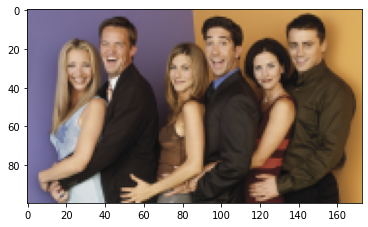

In [8]:
# apenas para ler uma imagem da web usando url
from skimage import io           
img       = io.imread('https://content.fortune.com/wp-content/uploads/2016/01/friends.jpg')

# redimensionando
w_ratio= 0.07267441860465117 # escolhi esses valores apenas resultar em 100 pixels de altura
h_ratio= 0.07267441860465117 # escolhi esses valores apenas resultar em 100 pixels de altura
img_menor = cv2.resize(img, (0,0), img, w_ratio, h_ratio, interpolation=cv2.INTER_AREA) 
print(img_menor.shape)

# mostra a imagem redimensionada
plt.imshow(img_menor)

Suponha que vamos extrair o rosto do personagem Ross, que está centralizado aproximadamente na coordenada $(25, 95)$.

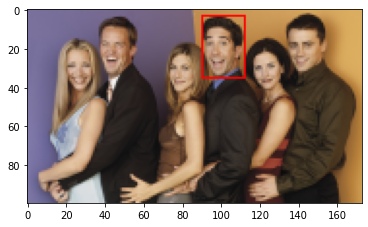

In [9]:
x = 95
y = 25
img_menor_ross_rect = img_menor.copy()                                                   # cria uma cópia da imagem original
cv2.rectangle(img_menor_ross_rect,(x+17,y+10), (x-5,y-22), color=(255,0,0), thickness=1) # desenha um retângulo a partir dos corner points
plt.imshow(img_menor_ross_rect)

Vamos: 
- criar uma matriz preenchida com valores $1$, do tamanho da imagem original
- zerar essa matriz na região de interesse (onde está o rosto do Ross)
- multiplicar essa matriz (máscara) pela imagem original e observar o resultado.

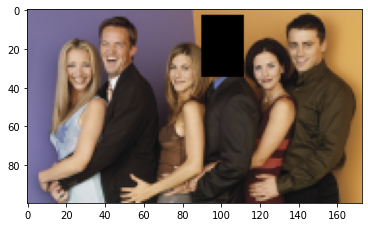

In [10]:
mask = np.ones_like(img_menor)
mask[y-22:y+10, x-5:x+17] = 0

plt.imshow(mask*img_menor)

Observe que a máscara manteve os pixels originais fora da região de interesse (multiplicou as intensidades por $1$), enquanto os valores $0$ da máscara anularam as cores da região de interesse ($(0,0,0)$ em RGB corresponde a cor preta).

Para realizar a seleção contrária, podemos usar a máscara complementar:

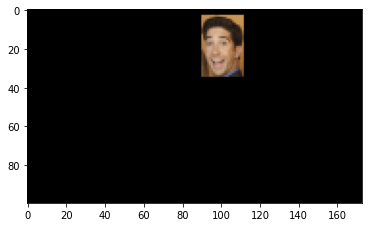

In [11]:
mask2 = np.zeros_like(img_menor)
mask2[y-22:y+10, x-5:x+17] = 1

plt.imshow(mask2*img_menor)

Além das máscaras, as técnicas de "slicing" também nos permitem selecionar regiões de interesse e processá-las diretamente. Isso pode ser feito na imagem original, ou após a aplicação de uma máscara como a anterior:

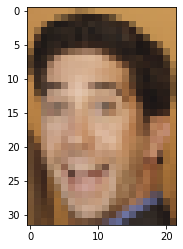

In [12]:
mask2 = np.zeros_like(img_menor)
mask2[y-22:y+10, x-5:x+17] = 1

ross_face_full  = mask2*img_menor
ross_face_slice =  ross_face_full[ross_face_full>0].reshape(32,-1,3)

plt.imshow(ross_face_slice)

Também podemos usar a máscara para filtrar as cores de canais específicos.

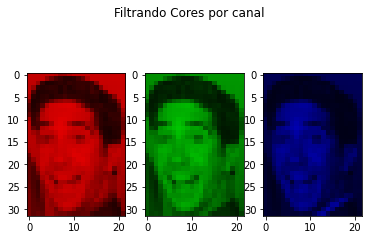

In [13]:
img_shape = ross_face_slice.shape[:2]

red_pass_filter   = np.stack([ np.ones(img_shape), np.zeros(img_shape), np.zeros(img_shape)], axis=2).astype(np.uint8)
green_pass_filter = np.stack([np.zeros(img_shape),  np.ones(img_shape), np.zeros(img_shape)], axis=2).astype(np.uint8) 
blue_pass_filter  = np.stack([np.zeros(img_shape), np.zeros(img_shape),  np.ones(img_shape)], axis=2).astype(np.uint8) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Filtrando Cores por canal')
ax1.imshow(ross_face_slice*red_pass_filter)
ax2.imshow(ross_face_slice*green_pass_filter)
ax3.imshow(ross_face_slice*blue_pass_filter)

<a name="C3"></a>
## Kernels: filtros convolucionais

No processamento de imagens, os pixels vizinhos geralmente estão fortemente relacionados entre si, especialmente ao analisarmos uma imagem em alta resolução.  

As transições de cores vão suavemente construindo a cenam ao longo do espaço. É claro que existem transições bruscas, quando encontramos contornos, silhuetas ou transitamos entre pixels de objetos diferentes capturados na mesmsa imagem.  

Os processos de filtragem de imagens são capazes de realçar determinadas características associadas a essas transições de intensidade de cores entre pixels.  

Ao estudarmos conceitos básicos de processamento de sinais, nos deparamos com o conceito de uma operação denominada "convolução". Uma convolução entre um sinal e um sistema (por exemplo, um filtro) nada mais é do que uma combinação ponderada de amostras do sinal de entrada para gerar amostras de um sinal de saída, o sinal filtrado. É como uma "média ponderada" do sinal de entrada.  

Entretanto, nossos sinais de entrada normalmente variam no tempo ou no espaço. Portanto, nosso filtro precisa ser aplicado em diferentes "janelas" do sinal de entrada para compor um sinal de saída correspondente. 

Em séries temporais, podemos pensar no seguinte exemplo: imagine que estamos rastreando a temperatura média de uma cidade e prevendo o valor futuro dessa temperatura no próximo dia. Podemos usar um filtro que considera apenas a temperatura média de hoje, e fazer uma previsão da temperatura de amanhã, ou podemos também considerar uma média ponderada dos últimos 3 dias (por exemplo, sexta, sabado e domingo), dando mais peso para o dia atual (domingo).  Nesse caso, no dia de amanhã (segunda-feira) vamos deslocar a nossa janela de amostras de entrada para as temperaturas de sábado, domingo e segunda-feira para fazer a previsão da temperatura de terça-feira. Veja que os pesos da nossa média ponderada (nosso filtro) permanecem constantes nesse processo (é um sistema invariante no tempo), garantindo que entradas idênticas sempre resultam na mesma previsão.

<img src="https://drive.google.com/uc?export=view&id=1tHZSvIO8zGAPKG2-eeNtYqCsCqFG_uMB" alt="Visualizando a convolução em séries temporais (animação by Bruno Fontana)." width="500px"/> 

Quando estamos filtrando imagens, precisamos percorrer as janelas do sinal de entrada não ao longo do tempo e sim ao longo do espaço, pois queremos extrair características ("médias ponderadas") dessa imagem percorrendo todas as suas dimensões.  

Em processamento de imagens, os filtros são normalmente chamados de "kernels". Esses filtros são representados como "pequenas" matrizes (por exemplo, $3\times3$ pixels) que possuem "pesos" diferentes para cada pixel de entrada numa amostra de igual tamanho. Ao deslocar essas pequenas matrizes por toda uma imagem, vamos gerando pixels médios que correspondem à uma filtragem (combinação) dos pixels de entrada.  

Um exemplo de kernel para imagens de um único canal (escala de cinza) é o **_blur_**, que pode ser representado pela seguinte matriz:
$\begin{bmatrix} 0.0625 & 0.125 & 0.0625 \\
0.125 & 0.25 & 0.125 \\
0.0625 & 0.125 & 0.0625
 \end{bmatrix}$,  
na qual podemos interpretar que cada pixel da saída é uma média da intensidade de cores da janela $3 \times 3$ ($9$ pixels no total) de entrada, dando maior peso ($1/4$) para o pixel central e menor peso ($1/16$) para os pixels nos cantos da imagem.

O engenheiro de software Victor Powell elaboro uma [ferramenta para visualizar o efeito da aplicação de kernels em imagens.](https://setosa.io/ev/image-kernels/)  Através dessa ferramenta, podemos compreender melhor o processo de convolução espacial: cada pixel da imagem de saída é uma espécie de "média ponderada" da janela (amostra) correspondente na imagem de entrada. Você pode deslocar a janela do kernel na imagem original e ver a correspondência com o pixel gerado na saída, visualizando no centro a operação realizada em cada passo.


<img src="https://drive.google.com/uc?export=view&id=1vy8q6NVANQ2VfsdVXIqzQzju-mKke3kr" alt="Visualizando kernels de imagens, por Victor Powell." width="500px"/> 



Vamos fazer um exemplo a seguir.  
Primeiramente, vou carregar uma imagem de uma parede de tijolos e redimensioná-la para um tamanho de $100\times100$ pixels.  

(15, 20, 3)


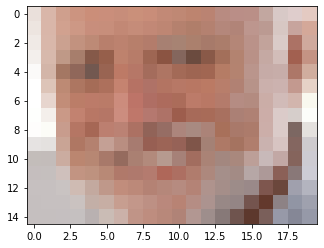

In [14]:
# apenas para ler uma imagem da web usando url         
input_img       = io.imread('https://ih1.redbubble.net/image.692988112.0952/pp,550x550.u3.jpg') # ('https://i.pinimg.com/originals/ea/e0/46/eae046cfe223a062a3a09822446b0e27.png')
input_img       = cv2.cvtColor(input_img, cv2.COLOR_RGBA2RGB) # remove alpha channel

# redimensionando
w_ratio= 0.0363636363636 # escolhi esses valores apenas resultar em 20 pixels de altura
h_ratio= 0.0363636363636 # escolhi esses valores apenas resultar em 20 pixels de altura
input_img_small = cv2.resize(input_img, (0,0), img, w_ratio, h_ratio, interpolation=cv2.INTER_AREA) 
print(input_img_small.shape)

# mostra a imagem redimensionada
plt.imshow(input_img_small)

Vamos definir um kernel (filtro) desejado para essa operação.  
Vou escolher o kernel "_outline_", retirado do site do Victor Powell:

$\begin{bmatrix} -1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
 \end{bmatrix}$,  

In [15]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)
print(kernel)

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


Considere o canal $0$ (R), inicialmente.  
Vamos acessar o topo superior da imagem (linhas $0$ a $2$ e colunas $0$ a $2$).

In [16]:
n=0
m=0 
sample = input_img_small[n:n+3, m:m+3, 0]
print(sample.shape, sample)

(3, 3) [[234 217 207]
 [237 217 209]
 [240 217 203]]


A operação realizada pelo kernel para gerar o primeiro pixel de saída é a multiplicação pixel a pixel (da amostra com o kernel):

In [17]:
sample*kernel

array([[-234., -217., -207.],
       [-237., 1736., -209.],
       [-240., -217., -203.]], dtype=float32)

e em seguida somamos todos os valores

In [18]:
pixel = np.sum(sample*kernel)
pixel

-28.0

Note que os resultados vão ficar fora da faixa ``uint8``, portanto será necessária uma normalização ao fim do processo.

Agora vamos criar uma animação onde esse processo vai sendo realizado ao longo da imagem percorrendo-a horizontalmente e depois deslocando uma linha para baixo por vez (ou seja, vamos gerar uma linha de cada vez na saída).

Primeiro vou carregar alguns pacotes para funções auxiliares, como atualizar as figuras dinamicamente e criar um produto cartesiano.

In [19]:
from time import sleep
from IPython import display
import pylab as pl
from itertools import product

def adiciona_retangulo_transparente(input_image, full_shape, corners, cor, alpha=0.5):
  (pt1, pt2) = corners
  
  # Initialize black image of same dimensions for drawing the rectangles
  blk = np.zeros(full_shape, np.uint8)
  # Draw rectangles on blk
  cv2.rectangle(blk, pt1, pt2, cor, -1)
   
  # Generate result by blending both images (opacity of rectangle image is 0.25 = 25 %)
  input_with_rectangle = cv2.addWeighted(input_image, 1.0, blk, alpha, 1)

  return input_with_rectangle

Agora vou inicializar alguns parâmetros importantes para o loop que realizará a convolução.

In [20]:
dt = 1e-3
print_iters = 10
width  = input_img_small.shape[0]
height = input_img_small.shape[1]
full_shape = input_img_small.shape
colors = [(255,0,0), (0,255,0), (0,0,255)]

Na animação a seguir, note que estamos percorrendo a imagem 3 vezes, pois fazemos o processamento de um canal de cor por vez.  
Observe que os contornos da imagem mais intensos no canal vermelho vão aparecendo com maior intensidade na saída. Após, o canal verde encontra contornos semelhantes nas mesmas regiões, deixando o resultado amarelado.  
Por fim, o canal azul também encontra esses contornos e acaba tornando a silhueta do objeto em questão praticamente branca na imagem de saída.

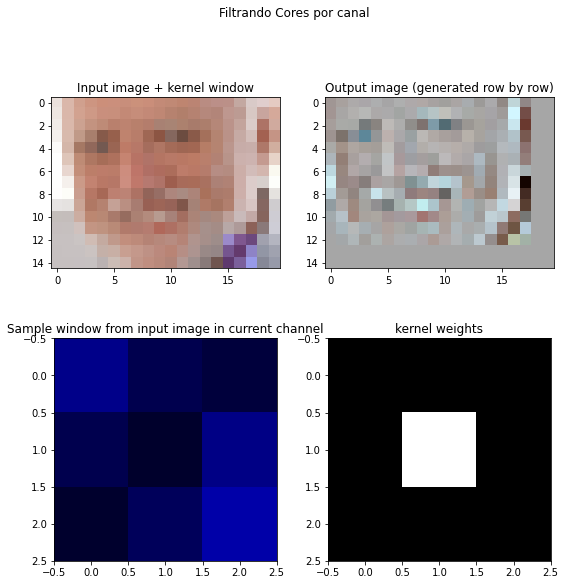

In [21]:
%matplotlib inline

output_image = np.zeros_like(input_img_small).astype(np.float32)
cnt = 0
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(9,9))

fig.suptitle('Filtrando Cores por canal')
ax1[0].set_title('Input image + kernel window')
ax1[1].set_title('Output image (generated row by row)')

ax2[0].set_title('Sample window from input image in current channel')
ax2[1].set_title('kernel weights')

ax2[1].imshow(kernel, vmin=-1, vmax=8, cmap='gray')

#sleep(5)

for ch, row, col in product(range(3), range(width-2), range(height-2)): 
    cnt += 1
    sample = input_img_small[row:row+3, col:col+3, ch]
    output_image[row, col, ch] = np.sum(sample*kernel)

    if cnt % print_iters == 0: 
      input_with_rectangle = adiciona_retangulo_transparente(input_img_small, full_shape, ((col, row), (col+2, row+2)), colors[ch], 0.25)
   
      output_image_print = (output_image-output_image.min())/(output_image.max()-output_image.min())

      sample_rgb = np.zeros(shape=(3,3,3)).astype(np.uint8)
      sample_rgb[:,:,ch] = sample 

      ax1[0].imshow(input_with_rectangle)
      ax1[1].imshow(output_image_print, vmin=0, vmax=1)
      
      ax2[0].imshow(sample_rgb, vmin=0, vmax=255)
      
      display.display(pl.gcf())
      display.clear_output(wait=True)
      #sleep(dt) 

Caso a execução fique muito lenta, veja o resultado na animação abaixo:

<img src="https://drive.google.com/uc?export=view&id=1M9kkxPXChlEHesK5sBfsfx0FFnnDHzqM" alt="Visualizando kernels de imagens (animação by Bruno Fontana)." width="500px"/> 

Note que o resultado final deste kernel apresenta a silhueta da imagem (a cor mais "branca" indica os pontos de contorno da silhueta).  
Ou seja, a convolução da imagem com esse kernel é um detector de contornos (de objetos, ou estruturas).  
Além disso, note as bordas laterias: foram perdidos dois pixels em cada direção (largura e altura) em virtude da impossibilidade de deslocar o kernel além das dimensões da imagem. Isso poderia ser compensado adicionando uma "moldura" (de espessura de 1 pixel) com pixels nulos ao redor da imagem. Esse procedimento é conhecido como  **_padding_**".

shape da imagem original: (15, 20, 3)
shape da imagem de saída, descartando a faixa perdida: (13, 18, 3)


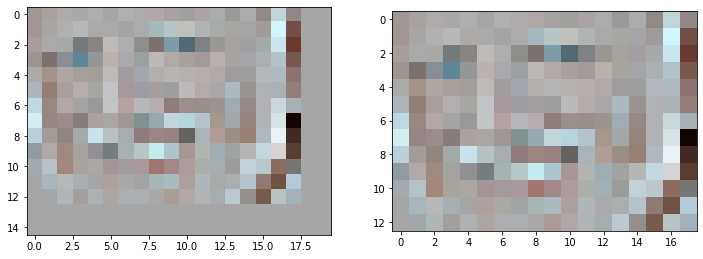

In [22]:
output_image_normalized = (output_image-output_image.min())/(output_image.max()-output_image.min())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.imshow(output_image_normalized)
ax2.imshow(output_image_normalized[:-2,:-2,:])
print(f'shape da imagem original: {input_img_small.shape}')
print(f'shape da imagem de saída, descartando a faixa perdida: {output_image_normalized[:-2,:-2,:].shape}')

<a name="C4"></a>
## (Max)-Pooling Operations

Como vimos anteriormente, **a operação de convolução envolve parâmetros**, os quais são representados na matriz do kernel. É possível também ter **uma matriz diferente para cada canal de entrada**, como vamos ver a seguir nas redes neurais convolucionais. Nesses casos, dizemos que o kernel é um "tensor", já que ele vai operar sobre os três canais simultaneamente (como um bloco tridimensional).  

Além dos kernels de convolução, também existem operadores chamados de "_pooling_". Diferente dos _kernels_ de filtragem, esses operadores não possuem nenhum parâmetro ajustável: eles apenas aplicam uma função (fixa) sobre a amostra de entrada. Os operadores mais comuns são _average pooling_, que faz uma média aritmética dos pixels de entrada, e **_max pooling_**, que seleciona a maior intensidade em relação aos pixels de entrada.   

Abaixo, faço uma pequena modificação para considerar uma operação _max-pooling_ sobre a imagem anterior, dessa vez aplicando sobre os $3$ canais de uma só vez (como um tensor) e gerando um único canal de saída.  

Também é comum que a operação _max-pooling_ faça deslocamentos maiores que $1$ pixel em cada direção. O controle do tamanho do passo de deslocamento é chamado de **_stride_**, e é utilizado para redimensionar a imagem, causando uma redução de tamanho.  

No exemplo abaixo, usaremos um stride $s=2$, diminuindo a imagem pela metade.  
Também vou carregar imagem original novamente com uma resolução um pouco maior.

(97, 126, 3)


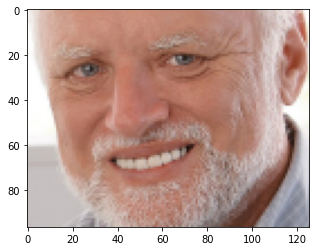

In [23]:
# apenas para ler uma imagem da web usando url         
input_img       = io.imread('https://ih1.redbubble.net/image.692988112.0952/pp,550x550.u3.jpg') # ('https://i.pinimg.com/originals/ea/e0/46/eae046cfe223a062a3a09822446b0e27.png')
input_img       = cv2.cvtColor(input_img, cv2.COLOR_RGBA2RGB) # remove alpha channel

# redimensionando
w_ratio= .23 #0.272727 # escolhi esses valores apenas resultar em 150 pixels de largura
h_ratio= .23 #0.272727 # escolhi esses valores apenas resultar em 150 pixels de largura
input_img_small = cv2.resize(input_img, (0,0), img, w_ratio, h_ratio, interpolation=cv2.INTER_AREA) 
print(input_img_small.shape)

# mostra a imagem redimensionada
plt.imshow(input_img_small)

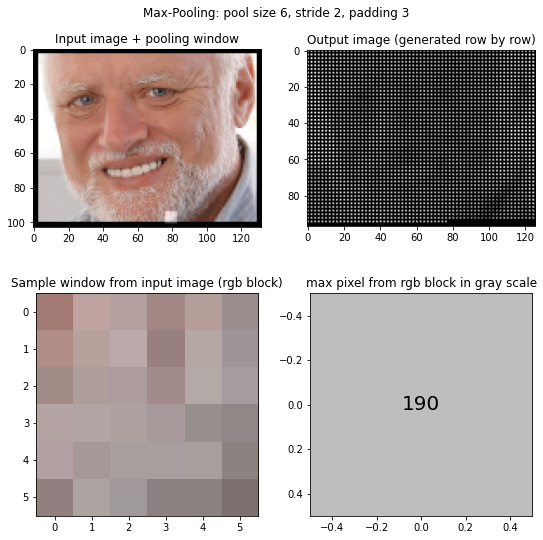

In [24]:
%matplotlib inline

dt=10e-3
pool_size = 6              # pool_size x pool_size
stride = 2
print_iters = 100
full_shape = input_img_small.shape
padding = int(pool_size/2)
padded_shape = (full_shape[0]+2*padding,full_shape[1]+2*padding,full_shape[2])

input_img_small_padded = np.zeros(shape=padded_shape, dtype=np.uint8)
input_img_small_padded[padding:-padding,padding:-padding,:] = input_img_small

width, height, _ = input_img_small_padded.shape 

output_image = np.zeros_like(input_img_small).astype(np.float32)
cnt = 0
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(9,9))

fig.suptitle(f'Max-Pooling: pool size {pool_size}, stride {stride}, padding {padding}',y=.91)
ax1[0].set_title('Input image + pooling window')
ax1[1].set_title('Output image (generated row by row)')

ax2[0].set_title('Sample window from input image (rgb block)')
ax2[1].set_title('max pixel from rgb block in gray scale')

sleep(3)
for row, col in product(range(0, width-pool_size, stride), range(0, height-pool_size, stride)): # passo de deslocamento em cada dimensão: stride
    cnt += 1
    sample = input_img_small_padded[row:row+pool_size, col:col+pool_size, :]
    output_image[row, col] = np.max(sample) # max-pooling

    if cnt % print_iters == 0: 
      input_with_rectangle = adiciona_retangulo_transparente(input_img_small_padded, padded_shape, 
                                                             ((col, row), (col+pool_size, row+pool_size)), 
                                                             (255,255,255), 0.25)

      output_image_print = (output_image-output_image.min())/(output_image.max()-output_image.min())
      sample_rgb = sample.copy()
      ax1[0].imshow(input_with_rectangle)
      ax1[1].imshow(output_image_print, vmin=0, vmax=1, cmap='gray')
      ax2[0].imshow(sample_rgb, vmin=0, vmax=255)
      
      pix_val = np.max(sample_rgb)
      ax2[1].imshow(pix_val.reshape(-1,1), vmin=0, vmax=255, cmap='gray')
      
      try:
        ann.remove()
      except:
        pass
      ann = ax2[1].annotate(str(pix_val), xy=(0,0),  horizontalalignment='center', verticalalignment='center', fontsize=20)

      display.display(pl.gcf())
      display.clear_output(wait=True)
      #sleep(dt) 

Caso a execução fique muito lenta, veja uma parcela do resultado na animação abaixo:

<img src="https://drive.google.com/uc?export=view&id=12-A0lSvsmLepSMK9Qj3ro0Z81HvQBilC" alt="Visualizando kernels de imagens (animação by Bruno Fontana)." width="500px"/> 



Note que devido ao stride, precisamos fazer um mapeamento dos pixels para um suporte menor.  
Na prática, basta um mapeamento de índices da entrada para a saída, sem a necessidade de gerar uma imagem grande e depois descartar. Mas neste exemplo, quis deixar evidente o efeito e vou fazer apenas um downsampling do resultado para obter a saída real.

shape da imagem original: (97, 126, 3)
shape da imagem de saída, descartando a faixa perdida: (49, 63, 3)


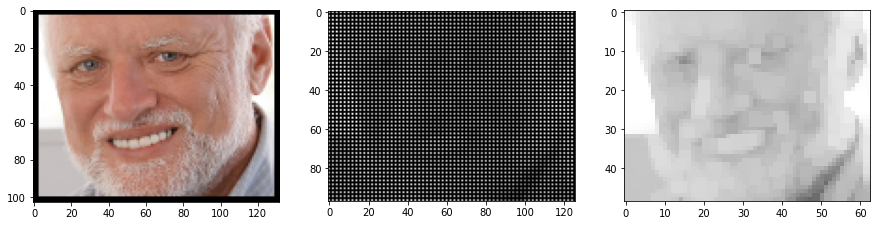

In [25]:
output_image_maxpool = output_image.copy()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
ax1.imshow(input_img_small_padded)
ax2.imshow(output_image_maxpool/255, vmin=0, vmax=1)
ax3.imshow(output_image_maxpool[::stride,::stride]/255, vmin=0, vmax=1)
print(f'shape da imagem original: {input_img_small.shape}')
print(f'shape da imagem de saída, descartando a faixa perdida: {output_image_maxpool[::stride,::stride].shape}')

Note que o shape final de imagem é calculado como:  
$d_{\text{out}} = \left\lfloor \dfrac{d_{\text{in}} + 2p -f}{s}\right\rfloor + 1 $  
onde $d$ pode ser a altura $H$ ou a largura $W$, sendo subscrito por "out" para indicar o valor de saída e "in" para indicar o valor de entrada, $p$ é a espessura da moldura de _padding_ (em pixels), $f$ é o tamanho do kernel  ou da janela de pooling (estamos assumindo janelas quadradas) e $s$ é o passo de deslocamento (stride). A operação $\lfloor x \rfloor$ indica arredondamento para baixo.  

Note que quando $p=f/2$, o resultado depende apenas do stride, sendo:
$d_{\text{out}} = \left\lfloor \dfrac{d_{\text{in}}}{s}\right\rfloor +1 $.  
Para isso, é necessário que $f$ seja um número positivo par.  

Note que o operador de arredondamento $\left\lfloor \cdot \right\rfloor$ garante que número fracionários sejam arrendondados para baixo a fim de obter o tamanho das dimensões de saída.

<a name="1"></a>
# Torch Vision e Datasets Clássicos

Nesta seção, vamos explorar o funcionamento de redes neurais profundas com o PyTorch.  

Vamos aprender sobre as camadas mais populares em modelos de visão computacional com _deep learning_: **camadas convolucionais e camadas max-pooling**.  

Além disso, vamos usar _datasets_ clássicos de classificação de imagens para implementar nossos exemplos.  

Primeiramente, vamos usar um _dataset_ em preto e branco (apenas um canal de cores), o clássico **MNIST**. Trata-se de um conjunto de imagens que representam dígitos numéricos entre $0$ e $9$. São dígitos escritos à mão, com algumas distorções causadas pela diferença de caligrafia dos números. Nosso objetivo é implementar uma rede neural convolucional profunda que aprenda a classificar qual o dígito apresentado na imagem de entrada. Trata-se de um **problema de classificação multi-classe**.   

<a name="I1"></a>
## Formato $\left(m, \text{C}, \text{H}, \text{W} \right)$

Ao processarmos _batches_ de imagens em redes neurais no **PyTorch**, preciasremos utilizar uma ordem diferente nas dimensões das imagens de entrada. A convenção no PyTorch é $\left(m, \text{C}, \text{H}, \text{W} \right)$, onde $m$ corresponde ao tamanho da _batch_ (número de imagens que serão processadas simultaneamente).  
Veremos em breve que para converter entre o padrão HWC e CHW basta realizar uma transposição das dimensões das imagens originais usando o método ``transpose`` do ``numpy`` ou ``permute`` dos tensores (basicamente uma permutação de dimensões $(0,1,2)$ para $(2,0,1)$).

<a name="I2"></a>
## Dataset MNIST

Vamos importar dois módulos bastante úteis da biblioteca ``torchvision``:
- ``datasets`` é um módulo que permite o acesso à conjuntos de dados de problemas clássicos de classificação de imagens
- ``transforms`` traz as implementações de operações básicas de pré-processamento de imagens, permitindo inclusive a criação de um pipeline de operações para realizar no carregamento dos dados. 

In [26]:
from torchvision import datasets, transforms

Nesta primeira parte, não vamos modificar as imagens originais.  
A transformação que será aplicada será apenas a conversão das imagens para tensores, usando ``transforms.ToTensor()``.

Note que uma das entrada para criação dos datasets a partir da base do ``torchvision`` é o parâmetro ``transform``.  

_**Obs.**: optando pelo download, será criado um diretório local, definido pelo parâmetro ``root``, a fim de armazenar temporariamente os dados._

In [27]:
transform  = transforms.ToTensor()
train_data = datasets.MNIST(root='./TV_Data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='./TV_Data', train=False, download=True, transform=transform)

Extracting ./TV_Data/MNIST/raw/train-images-idx3-ubyte.gz to ./TV_Data/MNIST/raw


Extracting ./TV_Data/MNIST/raw/train-labels-idx1-ubyte.gz to ./TV_Data/MNIST/raw


Extracting ./TV_Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./TV_Data/MNIST/raw




Extracting ./TV_Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./TV_Data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Podemos imprimir as informações do objeto que corresponde ao dataset carregado.  
Neste exemplo do MNIST, temos $60000$ (aprox. $85\%$ do total de) exemplos para treino e $10000$ par teste.  
Observe também que o objeto guarda o pipeline de transformações do pré-processamento.

In [28]:
# dataset de TREINO
print(type(train_data))  # mostra o tipo (ou classe) objeto
print(train_data)        # imprime as inforamções do objeto

<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./TV_Data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [29]:
# dataset de TESTE
print(type(test_data))  # mostra o tipo (ou classe) objeto
print(test_data)        # imprime as inforamções do objeto

<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./TV_Data
    Split: Test
    StandardTransform
Transform: ToTensor()


Para carregar um exemplo do dataset, podemos acessar o objeto como se fosse uma lista, onde cada elemento corresponde a uma tupla $(X, Y)$, sendo $X$ o dado de entrada (imagem) e $Y$ a saída (rótulo) correspondente.    


label: 4, img of shape torch.Size([1, 28, 28])
novo shape: torch.Size([28, 28])


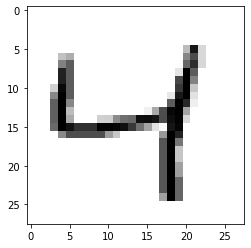

In [30]:
image, label = train_data[2] # acessa a terceira tupla da lista e desempacota em (X, Y)
print(f'label: {label}, img of shape {image.shape}') 

# verificando o formato da imagem
new_shape = image.shape[1:]        # note que a dimensão 0 corresponde ao tamanho da batch
print(f'novo shape: {new_shape}')      

# visualizando a imagem (note a inversão de cores no cmap)
plt.imshow(image.reshape(new_shape), cmap='gist_yarg')

<a name="I3"></a>
## Batch-DataLoader do PyTorch

 Quando trabalhamos com _datasets_ muito grandes, especialmente com imagens, que ocupam bastante memória, não é possível carregar todo o _dataset_ de uma única vez.  
Portanto, é necessário carregar "amostras" do dataset e usar cada uma delas em uma iteração de treino do gradiente descendente, até que tenhamos percorrido todo o dataset. Essas amostras são denominadas "**_batches_**".

Suponha que temos no total $M=1000$ imagens. Se usarmos _batches_ de tamanho $m=100$, será necessário amostrar o dataset $10$ vezes (sem repetição de exemplos) e executar o gradiente descendente $10$ vezes. Esse procedimento é denominado "**_batch gradient descent_**. No caso particular de apresentar $m=1$ exemplo por vez, a técnica é conhecida como "**_stochastic gradient descent_**" (SGD). 

Por um lado, isso é positivo pois permite **atualizar os parâmetros da rede múltiplas vezes ($M/m$ vezes) em uma única iteração pelo dataset de treino**.  Por outro lado, a ordem e a distribuição de cada amostra pode **afetar a convergência do treino**, gerando um certo "ruído" na atualização dos parâmetros em busca do mínimo global.

Em um próximo tutorial, vamos implementar manualmente um método  carregador de _batches_. Porém, neste tutorial, vamos adotar uma ferramenta muito útil do PyTorch: o método [``DataLoader``](https://pytorch.org/docs/stable/data.html), importado de ``torch.utils.data``.  

Como entradas do ``DataLoader``, vamos utilizar: 
- um **"objeto dataset"** do PyTorch (também pode ser um iterável genérico) 
- um tamanho de _batch_ (``batch_size``),
- uma _flag_ booleana indicando se vamos embaralhar ou não o conjunto de dados.   


In [31]:
torch.manual_seed(101)                                              # importante para reproducibilidade do código no caso de embaralhamento
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)  # para o treino, utilizaremos o embaralhamento
test_loader  = DataLoader(test_data,  batch_size=10, shuffle=False) # para o teste, não há necessidade de embaralhamento
print(type(train_loader))
print(train_loader)

<class 'torch.utils.data.dataloader.DataLoader'>


Abaixo, vamos visualizar como percorer um objeto DataLoader.  
O objeto é um gerador que produz uma tupla com $(X, Y)$.  
Neste caso, cada $X$ é uma _batch_ com $m$ imagens, enquanto $Y$ é uma _batch_ dos $m$ rótulos correspondentes das imagens de entrada. 

In [32]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # makes the spacing of numpy array wider

# first batch
for images, labels in train_loader:
  # 60000 images, 10 de cada vez: 6000 iterações
  break # só queremos a primeira batch


print(images.shape, labels.shape)         # m-CWH: (Color, Width, Height)
print('Labels: ', labels[:12].numpy())    # m labels

torch.Size([10, 1, 28, 28]) torch.Size([10])
Labels:  [   0    5    7    8    6    7    9    7    1    3]


Para fins de visualização, vamos usar também o método ``make_grid`` de ``torchvision.utils``. Esse método concatena as imagens de entrada em uma grade com tamanho especificado. Essa grade é transformada numa única única imagem de saída para visualização.  

Note aqui o uso de ``np.transpose`` como forma de permutar as dimensões da imagem CHW para HWC.

(32, 302, 3)


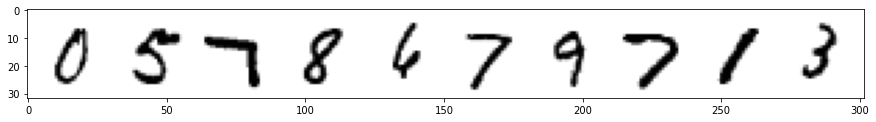

In [33]:
num_imgs = 12                                    # limitar o número máximo de imagens para carregar
im = make_grid(images[:num_imgs], nrow=num_imgs) # gerar uma imagem em formato de grade de imagens

im_numpy = im.numpy()                            # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))   # transpõe  as imagens de CHW para HWC (Height, Width, Color)
print(im_numpy_WHC.shape)                        # mostra o novo shape após a transposição

# imprime as primeiras imagens carregadas
plt.figure(figsize=(15,9))
plt.imshow(im_numpy_WHC[:,:,0],cmap='gist_yarg')

<a name="I4"></a>
## Camadas Convolucionais e Max-Pooling

Agora que sabemos como carregar _batches_ de exemplos do _dataset_, vamos entender como processá-las em uma rede neural.  

Na primeira seção, foi apresentada a operação "convolução" para processamento de imagens. Relembrando, a convolução é uma operação linear entre a imagem de entrada e um filtro, denominado _kernel_. Esse filtro possui $f_h \times f_w$ parâmetros. Em particular, por simplicidade, vamos usar apenas kernels quadrados, com $f \times f$ parâmetros.  

A principal vantagem da convolução é processar todos os pixels de uma imagem utilizando conjunto relativamente pequeno de parâmetros. Tipicamente, $f^2 \ll H\times W$.  Esse é um dos principais motivos de não utilizarmos camadas densas ($1$ parâmetro por pixel) como elemento principal em _deep learning_ para visão computacional.   

A principal diferença entre um _kernel_ de processamento de imagens e uma **camada convolucional** de redes neurais é o fato de que os parâmetros da camada convolucional serão adaptados em função do treinamento.  

Ou seja, **a rede neural vai "aprender" (tentando otimizar) os pesos adequados para cada _kernel_ de suas camadas convolucionais a fim de generalizar a tarefa que está sendo treinada para realizar**.

No PyTorch, podemos criar uma camada convolucional instanciando objetos da classe ``torch.nn.Conv2d``.  

Os parâmetros de entrada de uma camada convolucional são:
- ``in_channels``: quantos canais possui essa imagem (ex.: imagens em escala de cinza costumam possuir $1$ canal, enquanto imagens RGB possuem $3$ canais de entrada)
- ``out_channels``: quantos canais de saída queremos gerar; veja que será necessário **um kernel para cada ligação entre um canal de entrada e um canal de saída**
- ``kernel_size``: é o tamanho do kernel, no nosso caso, o valor de $f$ para produzir um _kernel_ $f \times f$
- ``stride``: é o passo (em número de pixels) de deslocamento do kernel ao longo da imagem de entrada (causa um _downsampling_, reduzindo as dimensões da imagem proporcionalmente)
-  outros parâmetros como ``padding`` e ``dilation`` não serão explorados neste tutorial.

Abaixo, vamos gerar nossa primeira camada convolucional para processar as imagens do MNIST.

In [34]:
conv1 = nn.Conv2d(in_channels=1,  # gray scale images
                  out_channels=6, # 6 feature channels (i.e. 6 filters for 1 channel) :: Arbitrário
                  kernel_size=3,  # filter size (3x3)
                  stride=1        # sliding step  
                  )

Podemos imprimir as inforamações da camada criada:

In [35]:
print(type(conv1))
print(conv1)

<class 'torch.nn.modules.conv.Conv2d'>
Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))


Vamos selecionar a primeira batch de exemplo:

In [36]:
for i, (x_train, y_train) in enumerate(train_data): # itera por tuplas numeradas (i, x, y) no dataset original
  break                                             # interrompe para selecionar o primeiro exemplo do dataset

print(x_train.shape)                        # channels x height x width
print(x_train.view(1,*x_train.shape).shape) # adiciona uma dimensão 

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


Vamos visualizar o primeiro exemplo de treino (uma imagem do digito $5$).  
Veja a seleção  do tensor ``x[0,0]``, indicando que estamos usando _slicing_ para escolher a primeira amostra da _batch_ (nesse exemplo, só existe uma amostra) e o primeiro canal (também é único, pois o MNIST é composto por imagens em escala de cinza).

torch.Size([1, 1, 28, 28])


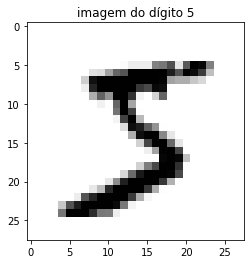

In [37]:
x = x_train.view(1,*x_train.shape) # redimnesiona a imagem CHW para formar uma batch de tamanho 1
print(x.shape)                     # imprime o shape da entrada

# visualizando o primeiro exemplo
plt.imshow(x[0,0].data.numpy(), cmap='gist_yarg')
plt.title(f'imagem do dígito {y_train}');

Primeiramente vamos visualizar como aplicar a primeira camada de convolução na imagem anterior.  
É importante saber que, no momento em que se instanciou o objeto da camada ``Conv2D``, os parâmetros do _kernel_ foram inicializados com valores aleatórios.  

Para aplicar a camada convolucional ``conv1`` sobre a _batch_ de entrada ``x``, basta fazer ``conv1(x)``, similar ao uso de uma função.  

torch.Size([1, 6, 26, 26])


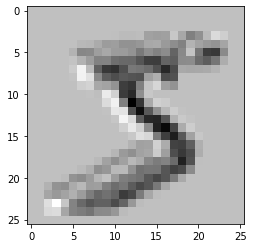

In [38]:
x_conv = conv1(x)     # aplica a camada convolucional sobre a entrada
print(x_conv.shape)   # perde informações na borda; alternativa: usar padding
plt.imshow(x_conv[0,3].data.numpy(), cmap='gist_yarg') 

Note que não estamos esperando nada significativo desse processo, pois o _kernel_ inicializou com valores aleatórios, e ainda não ocorreu seu treinamento.  

Porém, observe o _shape_ de saída: uma imagem de $28\times 28$ pixels, com um canal, produziu $6$ canais com imagens de $26 \times 26$ pixels. Isso porque existem $6$ _kernels_ diferentes nessa camada, para processar o canal de entrada e gerar $6$ saídas diferentes. A perda na resolução é devido a ausência de _padding_ e consequência do tamanho do _kernel_, conforme mencionado na seção anterior de fundamentos de processamento de imagem.

É muito comum aplicarmos uma **função de ativação** sobre o resultado da convolução.  
Uma ativação que se tornou recorrente em aplicações recentes de _deep learning_ foi a **unidade linear retificadora (ReLU)**.  Basicamente, a ReLU aplica a operação $\max{\left( 0, x_i \right) }$ sobre todos os elementos $x_i$ da saída da camada anterior.  

Para aplicar a ReLU, podemos fazer uso do método ``relu()`` da biblioteca ``torch.nn.functional``.  
Note que não há nenhum parâmetro a ser aprendido por essa camada.  Ela simplesmente funciona como estratégia de ativação das unidades (nesse caso, dos pixels) resultantes na saída de uma camada da rede neural.

torch.Size([1, 6, 26, 26])


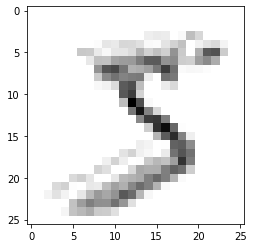

In [39]:
# repetimos a aplicação da camada convolucional, e em seguida aplicamos relu sobre o resultado
x1 = F.relu(conv1(x)) 
print(x1.shape)       # é o mesmo shape da saída da camada convolucional

plt.imshow(x1[0,3].data.numpy(), cmap='gist_yarg') 

Note que a função ReLU elimina os valores negativos da imagem.  Dessa maneira, também não é mais necessário fazer um ajuste de _offset_: apenas descarta-se os pixels de saída com valor negativo.  

Naturalmente, espera-se que os pixels ativados gerem características úteis para o processo de decisão no final da rede.

Por fim, é comum também utilizarmos camadas **_max-pooling_** com _stride_ $s\geq 2$, a fim de fazer um _downsampling_ nas imagens resultantes das camadas convolucionais.  

No exemplo abaixo, utilizamos a função ``max_pool2d`` da biblioteca ``torch.nn.functional``, com _kernel_ $2\times 2$ e _stride_ $s=2$.  

Note que a combinação $f=2$ e $s=2$ causa um _downsampling_ que reduz a resolução de $26 \times 26 $ pixels para $13 \times 13$.  Também ocorre um reforço dos pixels mais claros, deixando a imagem mais esbranquiçada (em função do operador $\max$).

torch.Size([1, 6, 13, 13])


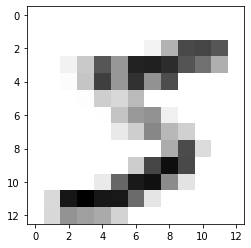

In [40]:
x1_mp = F.max_pool2d(x1, kernel_size=2, stride=2, padding=0) # aplica a camada max_pooling
print(x1_mp.shape)                                           # stride=2 divide o tamanho da imagem por 2

plt.imshow(x1_mp[0,2].data.numpy(), cmap='gist_yarg') 

Vamos então usar uma segunda camada convolucional.  
Dessa vez, temos $6$ canais de entrada, provenientes da camada anterior, e vamos gerar $16$ novos canais de saída.

In [41]:
conv2 = nn.Conv2d(in_channels=6,   # mesmo número de canais da camada anterior
                  out_channels=16, # 16 feature channels (16 filters for each of the previous channels) :: arbitrário
                  kernel_size=3,   # tamanho do filtro (kernel) convolucional (3x3)
                  stride=1         # passo de deslocamento (em pixels) durante a convolução img*filtro
                  )  

print(type(conv2))
print(conv2)

<class 'torch.nn.modules.conv.Conv2d'>
Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))


Novamente, aplicamos a camada convolucional e em sequência a ativação ReLU.  

Em seguida, selecionamos o canal (entre $0$ e $15$) de saída para visualização.  
Lembre que os pesos do _kernel_ também estão inicializados de forma aleatória.

torch.Size([1, 16, 11, 11])


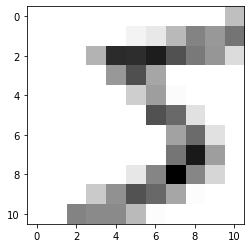

In [42]:
x2 = F.relu(conv2(x1_mp))
print(x2.shape)

# seleciona o canal para visualizar
ch = 10

# visualizando a saída
plt.imshow(x2[0,ch].data.numpy(), cmap='gist_yarg') 

Note que foram "perdidos" $2$ pixels em cada dimensão da imagem (agora a imagem é $11 \times 11$).

Novamente, aplicamos a camada ``max_pool2d`` com _stride_ $s=2$, reduzindo a imagem para $5 \times 5$.

torch.Size([1, 16, 5, 5])


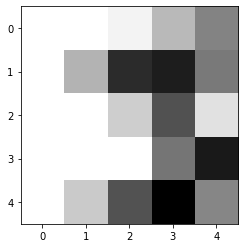

In [43]:
x2_mp = F.max_pool2d(x2, kernel_size=2, stride=2, padding=0)
print(x2_mp.shape) # stride=2 divide o tamanho da imagem por 2

plt.imshow(x2_mp[0,10].data.numpy(), cmap='gist_yarg') 

Por fim, precisamos transformar os últimos canais em um vetor de pixels, para tomar uma decisão sobre a classificação.  

Primeiramente, usamos o método ``view()`` dos tensores, para transformar as batches em vetores linha.  

In [44]:
x2_mp_flattened = x2_mp.view(1,-1) # transforma as batches na saída da última camada convolucional em vetores de pixels
print(x2_mp_flattened.shape)       # imprime o shape: [batch_size, num_pixels]

torch.Size([1, 400])


Com os vetores de pixels resultantes da última camada convolucional, vamos aplicar uma camada ``Linear`` e reduzir o número de pixels de cada imagem para vetores do tamanho do número de classes que estamos tentando prever (neste exemplo: $10$ classes, correspondentes aos dígitos).

In [45]:
in_features = x2_mp_flattened.shape[1]                # número de pixels resultantes de cada exemplo
Dense_Layer = nn.Linear(in_features, out_features=10) # saída com número de features igual ao núnmero de classes  
x_logits = Dense_Layer(x2_mp_flattened)
print(x_logits.shape)

torch.Size([1, 10])


Finalmente, usamos a função ``log_softmax`` de ``torch.nn.functional`` para estimar qual é a classe dessa imagem.  

Note que ``log_softmax`` corresponde ao mapeamento dos valores normalizados (pela função _SoftMax_) para uma escala entre $-\infty$ e $0$. O valor mais próximo de $0$ corresponde à maior probabilidade.

In [46]:
LogSoftMax = nn.LogSoftmax(dim=1)
output = LogSoftMax(x_logits)
print(output.shape, torch.exp(output).sum(dim=1)) # note que a soma de exp(log_softmax) deve resultar em 1
print(f'Classe com maior probabilidade: {torch.argmax(output)}')
print(output)                                     # 

torch.Size([1, 10]) tensor([1.0000], grad_fn=<SumBackward1>)
Classe com maior probabilidade: 2
tensor([[-2.2578, -2.4105, -2.2124, -2.2900, -2.2991, -2.2847, -2.4769, -2.3074,
         -2.2565, -2.2581]], grad_fn=<LogSoftmaxBackward>)


Pronto! Agora já entendemos como funcionam as camadas convolucionais e _max-pooling_, além da camada de saída ``log_softmax``.  
Podemos então criar nosso modelo de classificação de imagens multi-classe.

<a name="I5"></a>
## Criando o Modelo

Para entender os aspectos básicos da criação de classes para modelos de redes neurais no PyTorch, [estude aqui](https://github.com/fontanads/machine_learning/blob/master/pytorch_labs/Introdu%C3%A7%C3%A3o_ao_PyTorch_da_Regress%C3%A3o_Linear_%C3%A0_NLP_com_word_embeddings.ipynb) as partes 2 e 3 do tutorial mais básico do _framework_.

Vamos criar uma classe herdando de ``nn.Module``, sobrescrevendo o método construtor ``__init__`` e o método ``forward``.  

É importante ressaltar o seguinte:
- no método construtor ``__init__``, devem estar declaradas todas as camadas com parâmetros que serão otimizados no treinamento;
- no metodo ``forward``, definimos a sequência de processamento do modelo, podendo incluir camadas não-treináveis que não foram declaradas no ``__init__``.

In [47]:
class ConvNet(nn.Module):
  ''' ConvNet
  '''

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,  kernel_size=3, stride=1) # camada convolucional 1 ch --> 6 ch
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1) # camada convolucional 6 ch --> 16 ch
    self.fc1   = nn.Linear(5*5*16, 120)                                             # camada linear 400 x 120 
    self.fc2   = nn.Linear(120, 84)                                                 # camada linear 120 x 84
    self.fc3   = nn.Linear(84, 10)                                                  # camada linear 84 x 10 (classes)

  def forward(self, X):
    X = F.relu(self.conv1(X))  # entrada X passa por uma camada convolucional + ReLU
    X = F.max_pool2d(X, 2, 2)  # max_pooling com kernel f=2 e stride s=2
    X = F.relu(self.conv2(X))  # segunda camada convolucional + ReLU
    X = F.max_pool2d(X, 2, 2)  # max_pooling com kernel f=2 e stride s=2
    X = X.view(X.shape[0], -1) # reshape para (-1, 16*5*5): processo de "vetorização" da imagem (flatten) em uma única dimensão
    X = F.relu(self.fc1(X))    # camada Linear + ReLU
    X = F.relu(self.fc2(X))    # camada Linear + ReLU
    X = self.fc3(X)            # camada Linear
    return F.log_softmax(X, dim=1) # retorna log_softmax com as log-probabilidades de cada classe de cada exemplo da batch

Vamos instanciar o modelo (não é necessário passar nenhum argumento de entrada, pois dexamos os valores fixos no construtor).  

Caso a GPU esteja disponível, vamos transformar o modelo usando o método ``.cuda()``. Assim, o modelo poderá ser processado pelas GPUs, agilizando o treinamento.

In [48]:
torch.manual_seed(42) # para reproducibilidade
modelo = ConvNet()    # instancia o modelo
if CUDA_flag:         # se houver GPUs disponíveis
  modelo.cuda()       # converte o modelo para CUDA

# imprime as características do modelo
print(type(modelo)) 
print(modelo)

<class '__main__.ConvNet'>
ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Para descobrir quais camadas possuem parâmetros treináveis e quantos parâmetros existem no modelo, podemos percorrer as camadas pelo método ``named_parameters()``, um gerador que retorna uma tupla com o nome da camada e seus parâmetros.  
Para extrair o número de elementos dos parâmetros de cada camada, chamamos o método ``numel()`` dos tensores correspondentes.

In [49]:
total_params = 0
for name, param in modelo.named_parameters():
  n_params = param.numel()
  total_params += n_params
  print(f'camada {name} possui {n_params} parâmetros') # imprime o número total de parâmetros por camada
print(f"total de parâmetros = {total_params}")

camada conv1.weight possui 54 parâmetros
camada conv1.bias possui 6 parâmetros
camada conv2.weight possui 864 parâmetros
camada conv2.bias possui 16 parâmetros
camada fc1.weight possui 48000 parâmetros
camada fc1.bias possui 120 parâmetros
camada fc2.weight possui 10080 parâmetros
camada fc2.bias possui 84 parâmetros
camada fc3.weight possui 840 parâmetros
camada fc3.bias possui 10 parâmetros
total de parâmetros = 60074


Note que:
- existem valores de ``bias`` (um para cada canal de saída) que somam com o operador de convolução: $y_{\text{ch}} = \text{imagem} \ast \text{kernel} + \text{bias}$
- cada _kernel_ entre um canal de entrada e um canal de saída é treinado de maneira independente; o total de parâmetros fica $\text{num_of_input_channels} \times \text{num_of_output_channels} \times f^2$
- mesmo com apenas duas camadas convolucionais, e imagens de entrada com $28 \times 28$ pixels, o número total de parâmetros é da ordem de $\approx 60000$; a primeira camada densa, que transforma as imagens em vetores, é a que causa a explosão do número de parâmetros; a partir daí, começa-se a reduzir cada vez mais o número de features.  

<a name="I6"></a>
## Critério de Desempenho e Otimização

A função custo adequada para tratar a saída da ``log_softmax`` é a **"_negative $\log$ likelihood loss_" (NLLL)**, ou seja, o valor negativo da $\log$-verossimilhança. Vamos instanciar usando ``torch.nn.NLLLoss``.  

Como algoritmo de atualização dos parâmetros, vamos adotar o método ``torch.optim.Adam``, especificando os parâmetros do modelo a ser treinado e a _learning rate_ desejada.

In [50]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)

<a name="I7"></a>
## Treinando a Rede

Abaixo, vamos executar o nosso laço de treinameto.  
Para percorrer o dataset, vamos carregar uma _batch_ de cada vez, usando o gerador ``train_loader``, criado previamente com o ``DataLoader`` do PyTorch.  

Como a ``batch_size`` escolhida para o gerador foi $m=10$ e o dataset de treino possui $M=60000$ exemplos, levaremos $M/m = 6000$ iterações para percorrer o dataset completo. Note que isso significa atualizar os parâmetros do modelo $6000$ vezes. 

O valor ``max_epochs`` define quantas vezes vamos repetir o procedimento, ou seja, quantas vezes vamos apresentar o dataset completo para o modelo se treinado.  

Note que o total de iterações do _loop_ de treino é $\text{max_epochs} \times (M/m)$.  

Também é importante observar que cada _batch_ gera um valor de perda da função custo.  Para visualizar a perda de cada época, vamos acumular a soma das perdas todas as _batches_ e fazer a média entre elas. A taxa de acerto (_accuracy_) de cada época também será armazenada.

In [51]:
max_epochs = 5 # número de vezes que percorremos o dataset por completo

# "trackers"
train_losses  = [] # cada elemento é a soma das perdas médias das batches de cada época (treino)
test_losses   = [] # cada elemento é a soma das perdas médias das batches de cada época (teste)
train_correct = [] # total de acertos de cada época (treino)
test_correct  = [] # total de acertos de cada época (teste)


# training loop
for i in range(max_epochs): # para cada época

  # inicialização de acumuladores
  trn_correct  = 0
  tst_correct  = 0
  loss_val_trn = 0
  loss_val_tst = 0

  # Training batches
  for b, (X_train, Y_train) in enumerate(train_loader): # para cada batch numerada do gerador
    
    if CUDA_flag: # usar GPU?
      X_train = X_train.cuda()
      Y_train = Y_train.cuda()
    # aplica as entradas no modelo e obtém a previsão de saída
    y_pred = modelo(X_train)
    
    # calcula a perda comparando a saída com os rótulos verdadeiros
    loss   = criterion (y_pred, Y_train)
    loss_val_trn += loss.item()/6000     # salva o valor da perda média dessa batch

    # faz as medições de taxa de acerto (acc)
    predicted  = torch.argmax(y_pred.data, dim=1)    # índices das saídas de cada exemplo com maior confiança
    batch_corr = (predicted == Y_train).sum() # compara os rótulos com as decisões e soma o vetor booleano (True: 1, False: 0) 
    trn_correct  += batch_corr                       # acumula o número de acertos da batch atual

    # Atualização dos parâmetros do Modelo
    optimizer.zero_grad()     # inicializa os gradientes
    loss.backward()           # backpropagation
    optimizer.step()          # atualização dos parâmetros com a learning-rate e gradientes

    
    # imprime o status
    if b%600 ==0:
      print(f' epoch {i} batch {b} LOSS: {loss.item()} ')

  # salva as variáveis de perda/acc nas listas correspondentes (trackers)
  train_losses.append(loss_val_trn)
  train_correct.append(trn_correct)
    
  # Realizando o Teste do Modelo em paralelo com o treino
  with torch.no_grad(): # sem cálculo de gradientes (parâmetros fixos)
    for b, (X_test, Y_test) in enumerate(test_loader): # para cada batch numerada
      
      if CUDA_flag: # usar GPU?
        X_test = X_test.cuda() 
        Y_test = Y_test.cuda()
      # aplica o modelo na batch de teste    
      y_val = modelo(X_test)

      # cálculo da perda
      loss = criterion(y_val, Y_test)
      loss_val_tst += loss.item()/1000

      # estima os rótulos de saída usando argmax da log_softmax
      predicted = torch.argmax(y_val.data,dim=1)          #  índice do elemento com maior confiança na saída de cada exemplo
      tst_correct += (predicted == Y_test).sum()   #  compara previsão com rótulos verdadeiros e soma os acertos

    # salva as variáveis de perda/acc nas listas correspondentes (trackers)
    test_losses.append(loss_val_tst)
    test_correct.append(tst_correct)

print('\n# finished training!')

 epoch 0 batch 0 LOSS: 2.3160650730133057 
 epoch 0 batch 600 LOSS: 0.2351452112197876 
 epoch 0 batch 1200 LOSS: 0.006018443964421749 
 epoch 0 batch 1800 LOSS: 0.033379241824150085 
 epoch 0 batch 2400 LOSS: 0.027586137875914574 
 epoch 0 batch 3000 LOSS: 0.053335390985012054 
 epoch 0 batch 3600 LOSS: 0.010354711674153805 
 epoch 0 batch 4200 LOSS: 0.00379161280579865 
 epoch 0 batch 4800 LOSS: 0.26466479897499084 
 epoch 0 batch 5400 LOSS: 0.00272831367328763 
 epoch 1 batch 0 LOSS: 0.028568053618073463 
 epoch 1 batch 600 LOSS: 0.00024188714451156557 
 epoch 1 batch 1200 LOSS: 0.24978986382484436 
 epoch 1 batch 1800 LOSS: 0.1938786804676056 
 epoch 1 batch 2400 LOSS: 0.001101488946005702 
 epoch 1 batch 3000 LOSS: 0.0002472847409080714 
 epoch 1 batch 3600 LOSS: 0.00038272730307653546 
 epoch 1 batch 4200 LOSS: 0.0003789074835367501 
 epoch 1 batch 4800 LOSS: 0.018445640802383423 
 epoch 1 batch 5400 LOSS: 0.004093487747013569 
 epoch 2 batch 0 LOSS: 0.05728007107973099 
 epoch 2

Após o treino, podemos visualizar a evolução da perda, comparando o dataset de treino com o dataset de teste.  Note que não há muita diferença para a perda do dataset de teste após a primeira iteração do treinamento (o modelo já generalizou bem).

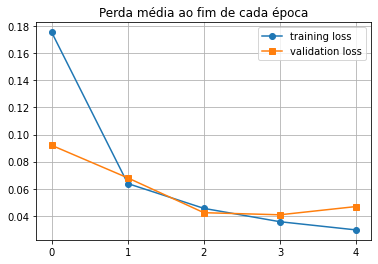

In [52]:
plt.plot(train_losses, '-o', label='training loss')
plt.plot(test_losses, '-s', label='validation loss')
plt.title('Perda média ao fim de cada época')
plt.grid()
plt.xticks(ticks=range(5))
plt.legend();

Na lista do _tracker_ do número de acertos, guardamos os tensores correspondentes de cada época. Para acessar seus valores, precisamos extrair ``.data.cpu()`` e então converter para numpy. Veja o exemplo abaixo para a época $0$:

In [53]:
train_correct[0].data.cpu().numpy()

array(56656)

Agora vamos calcular a taxa de acerto (percentual) do treino e do teste.  
No treino, a normalização é para $60000$ exemplos, enquanto no teste é apra $10000$.  

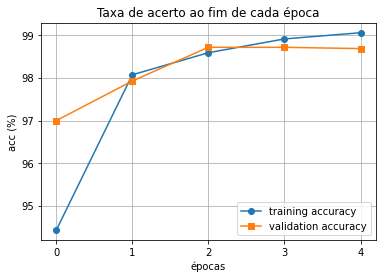

In [54]:
plt.plot([100*t.data.cpu().numpy()/60000 for t in train_correct], '-o', label='training accuracy')
plt.plot([100*t.data.cpu().numpy()/10000 for t in test_correct], '-s' ,label='validation accuracy')
plt.title('Taxa de acerto ao fim de cada época')
plt.ylabel('acc (%)')
plt.xlabel('épocas')
plt.grid()
plt.xticks(ticks=range(5))
plt.legend();

<a name="I8"></a>
## Testando a rede e analisando features

Vamos calcular novamente as previsões de saída, agora aplicando o modelo sobre todos os exemplos dataset de teste.

In [55]:
# extraindo todos os exemplos do dataset em uma única batch de tamanho m=10000
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad(): # sem gradiente
    correct = 0
    for X_test, y_test in test_load_all:
      
      if CUDA_flag: # usar GPU?
        X_test = X_test.cuda()
        y_test = y_test.cuda() 
      
      y_val = modelo(X_test)                  # previsões do modelo
      predicted = torch.argmax(y_val,dim=1)   # decisão sobre as previsões
      correct += (predicted == y_test).sum()  # calcula número de acertos

acc = correct.item()/len(test_data)         # cálcula taxa de acerto
print(f'Taxa de acerto (Accuracy) do teste: {acc:.4f} = {100*acc:3.4f}%')

Taxa de acerto (Accuracy) do teste: 0.9869 = 98.6900%


Para entender quais os erros do modelo, vamos gerar uma matriz de confusão entre as classes previstas e as classes verdadeiras.  

As linhas correspondem às classes verdadeiras, enquanto as colunas correspondem às classes previstas.  
Idealmente, as maiores contagens devem estar na diagonal da matriz (acertos).  
Valores fora da diagonal indicam erros de classificação (linha: classe verdadeira, coluna: classe prevista, errada).

In [56]:
# imprimir uma linha de valores de referência para os índices das colunas 
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# extrai os valores previsto/verdadeiro em formato numpy-array
y_pred_plot = predicted.view(-1).data.cpu().numpy()
y_test_plot =  y_test.view(-1).data.cpu().numpy()

matriz_de_confusao = confusion_matrix(y_pred_plot , y_test_plot)

# imprimir a matriz de confusão 
for i in range(10): # usar isso para imprimir também o índice de cada linha
  print(i, matriz_de_confusao[i])

[[   0    1    2    3    4    5    6    7    8    9]]

0 [ 976    0    4    1    0    2    8    2    8    1]
1 [   2 1129   10    1    0    0    2    1    0    1]
2 [   0    0 1010    1    0    0    0    7    0    0]
3 [   0    0    1 1001    0    8    0    2    2    0]
4 [   0    0    1    0  977    0    1    0    1    4]
5 [   0    2    0    4    0  879    2    1    1    5]
6 [   1    1    0    0    2    1  944    0    2    1]
7 [   1    1    4    1    0    0    0 1003    0    1]
8 [   0    2    2    1    1    1    1    2  957    3]
9 [   0    0    0    0    2    1    0   10    3  993]


Podemos perceber que os principais erros acontecem entre:
- $0$ (verdadeiro) $\to$ $8$ (previsto), total de $13$ erros,
- $2$ (verdadeiro) $\to$ $7$ (previsto), total de $12$ erros,
- $3$ (verdadeiro) $\to$ $5$ (previsto), total de $9$ erros.

_(Obs: é possível que você observe variações dos resultados em razão da ordem de execução das células e uso ou não das sementes geradoras de números aleatórios.)_

Podemos tentar acessar as camadas treinadas para entender os filtros que a rede convolucional aprendeu.  
Para acessar as camadas, podemos usar diretamente ``modelo.<layer>``, chamado a camada ``<layer>`` de interesse.  
No nosso caso, as camadas convolucionais são:

In [57]:
conv1_treinada = modelo.conv1
conv2_treinada = modelo.conv2

Vamos também carregar uma batch de exemplos de teste e visualizar os dígitos dos exemplos.  

Dessa vez, vamos usar o mapa de cores "_hot_" para destacar os pixels mais ativados. Os pixels mais intensos ficam brancos, os mais fracos ficam em preto, e a transição ocorre numa escala do vermelho escuro para um amarelo claro.

torch.Size([10, 1, 28, 28]) torch.Size([10])


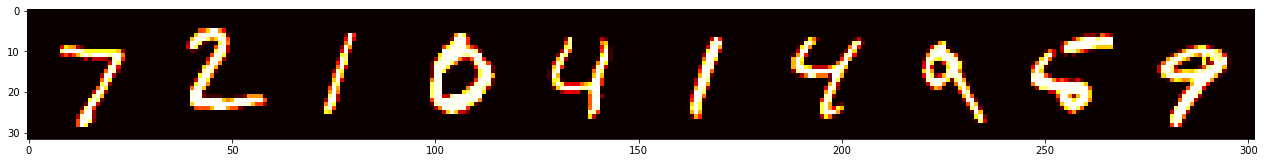

In [58]:
# extraindo uma única batch do dataset de teste
batch_size = 10
test_load_all = DataLoader(test_data, batch_size=batch_size, shuffle=False)

for X_test, y_test in test_load_all:
  if CUDA_flag:
    X_test = X_test.cuda()
    y_test = y_test.cuda()
  break

print(X_test.shape, y_test.shape)

# imprime as imagens da batch de entrada
im = make_grid(X_test.data.cpu(), nrow=batch_size)        # gerar uma imagem em formato de grade de imagens
im_numpy = im.numpy()                            # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))   # transpõe  as imagens de CHW para HWC (Height, Width, Color)
plt.figure(figsize=(22,12))
plt.imshow(im_numpy_WHC[:,:,0],cmap='hot') # imprime as primeiras imagens carregadas

Agora vamos aplicar a primeira camada convolucional (com ReLU e max-pooling) e verificar o resultado na saída:

torch.Size([10, 6, 13, 13])


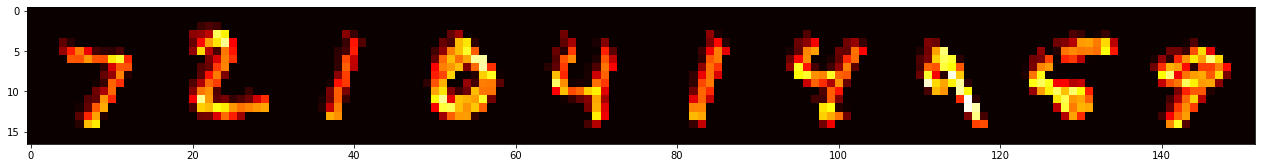

In [59]:
with torch.no_grad(): # sem gradiente
    x_conv1 = F.max_pool2d(F.relu(conv1_treinada(X_test)), 2, 2)
print(x_conv1.shape)

# imprime as imagens da batch de entrada após a primeira camada convolucional
im = make_grid(x_conv1.data.cpu(), nrow=batch_size)        # gerar uma imagem em formato de grade de imagens
im_numpy = im.numpy()                            # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))   # transpõe  as imagens de CHW para HWC (Height, Width, Color)
plt.figure(figsize=(22,12))
plt.imshow(im_numpy_WHC[:,:,0],cmap='hot') # imprime as primeiras imagens carregadas

Por fim, vamos aplicar a segunda camada convolucional para visualizar o resultado:

torch.Size([10, 16, 5, 5])


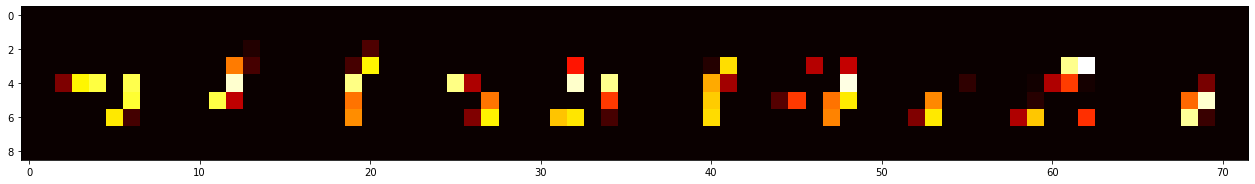

In [60]:
with torch.no_grad(): # sem gradiente
    x_conv2 = F.max_pool2d(F.relu(conv2_treinada(x_conv1)), 2, 2)
print(x_conv2.shape)

# imprime as imagens da batch de entrada após a segunda camada convolucional
im = make_grid(x_conv2.data.cpu(), nrow=batch_size)        # gerar uma imagem em formato de grade de imagens
im_numpy = im.numpy()                            # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))   # transpõe  as imagens de CHW para HWC (Height, Width, Color)
plt.figure(figsize=(22,12))
plt.imshow(im_numpy_WHC[:,:,0],cmap='hot')      # imprime as primeiras imagens carregadas

Note que cada imagem ativou um padrão diferente de pixels na saída.  
Esses pixels, ao serem processados pelas camadas densas, vão produzir os valores de saída para a probabilidade de cada classe.

<a name="I9"></a>
## Dataset CIFAR-10: Classificando Imagens Coloridas

Vamos fazer um breve exemplo com o dataset [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10).  
Nesse dataset, temos $60000$ imagens de $32 \times 32$ pixels, e existem $10$ classes diferentes.

In [61]:
cifar10_classes = ['aviões', 'carros', 'passáros', 'gatos', 'cervos', 'cachorros', 'sapos', 'cavalos', 'navios', 'caminhões']
for i, c in enumerate(cifar10_classes):
  print(f'Classe {i}: {c}.')

Classe 0: aviões.
Classe 1: carros.
Classe 2: passáros.
Classe 3: gatos.
Classe 4: cervos.
Classe 5: cachorros.
Classe 6: sapos.
Classe 7: cavalos.
Classe 8: navios.
Classe 9: caminhões.


Vamos carregar esse dataset, usando o mesmo procedimento do MNIST, e aplicando as mesmas transformações (apenas convertendo para tensor).  

In [62]:
train_data = datasets.CIFAR10(root='./TV_Data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./TV_Data', train=False, download=True, transform=transform)

Extracting ./TV_Data/cifar-10-python.tar.gz to ./TV_Data
Files already downloaded and verified


Agora verificamos o tamanho dos datasets de treino ($50000$) e teste ($10000$).

In [63]:
print('Treino:', train_data,'\n')
print('Teste:', test_data)

Treino: Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./TV_Data
    Split: Train
    StandardTransform
Transform: ToTensor() 

Teste: Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./TV_Data
    Split: Test
    StandardTransform
Transform: ToTensor()


Instanciamos o ``DataLoader`` para o treino e para o teste:

In [64]:
torch.manual_seed(101)  # para reproducibilidade
batch_size = 25
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=batch_size, shuffle=False)

gatos     passáros  aviões    cervos    caminhões 
cachorros carros    passáros  cervos    navios    
cavalos   aviões    caminhões cervos    carros    
cavalos   caminhões cervos    aviões    sapos     
cervos    passáros  caminhões cachorros cachorros 


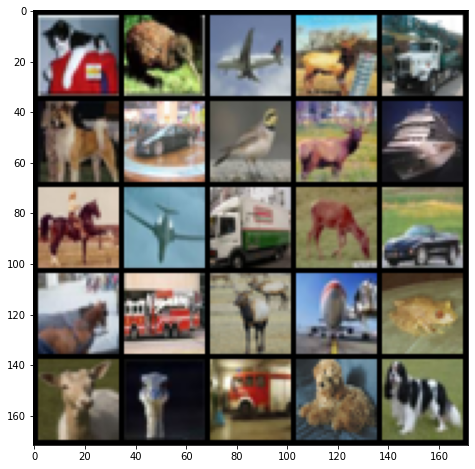

In [65]:
for images, labels in train_loader:
  break

# grid de uma batch de 25 exemplos do CIFAR-10
im = make_grid(images, nrow=5)                   # gerar uma imagem em formato de grade de imagens
im_numpy = im.numpy()                            # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))   # transpõe  as imagens de CHW para HWC (Height, Width, Color)
plt.figure(figsize=(8,8))
plt.imshow(im_numpy_WHC)      #                   imprime as primeiras imagens carregadas


# imprime os rótulos da imagem em formato de grade
labels_str    = [cifar10_classes[i] for i in labels]
grouped_words = [labels_str[i:i+5] for i in range(0, len(labels_str), 5)]
for grupo in grouped_words:
  print("".join("{:<10}".format(item) for item in grupo))

Vamos agora criar um modelo de uma rede convolucional para essa classificação.  

A principal diferença está no _shape_ dos exemplos de entrada: no CIFAR-10 temos $C=3$ canais (RGB) e $H=W=32$ pixels.  

Portanto, é necessário informar corretamente os parâmetros para a camada de entrada.

In [66]:
class ConvNet_Cifar10(nn.Module):
  ''' ConvNet_Cifar10
  '''
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6,  kernel_size=3, stride=1) # camada convolucional 3 ch --> 6 ch
    # kernel 3x3 convolui cada canal 32 x 32 ---> saída 30 x 30, e com max-pooling (f=s=2) --> saída 15 x 15
    
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1) # camada convolucional 6 ch --> 16 ch
    # kernel 3x3 convolui cada canal  15 x 15 ---> saída 13 x 13, e com max-pooling (f=s=2) --> saída 6x6
    
    # aqui, os 16 canais vão ter imagens 6x6 pixels, e vamos vetorizá-las:
    self.fc1   = nn.Linear( (6*6)*16, 120)                                          # camada linear 576 x 120 
    self.fc2   = nn.Linear(120, 84)                                                 # camada linear 120 x 84
    self.fc3   = nn.Linear(84, 10)                                                  # camada linear 84 x 10 (classes)

  def forward(self, X):
    X = F.relu(self.conv1(X))  # entrada X passa por uma camada convolucional + ReLU
    X = F.max_pool2d(X, 2, 2)  # max_pooling com kernel f=2 e stride s=2
    X = F.relu(self.conv2(X))  # segunda camada convolucional + ReLU
    X = F.max_pool2d(X, 2, 2)  # max_pooling com kernel f=2 e stride s=2
    X = X.view(X.shape[0], -1) # reshape para (-1, 16*5*5): processo de "vetorização" da imagem (flatten) em uma única dimensão
    X = F.relu(self.fc1(X))    # camada Linear + ReLU
    X = F.relu(self.fc2(X))    # camada Linear + ReLU
    X = self.fc3(X)            # camada Linear
    return F.log_softmax(X, dim=1) # retorna log_softmax com as log-probabilidades de cada classe de cada exemplo da batch

Agora instanciamos o modelo e vamos contar número total de parâmetros.

Note o aumento do número de parâmetros, principalmente em razão do aumento na resolução da imagem de entrada.

In [67]:
torch.manual_seed(42)         # para reproducibilidade
modelo = ConvNet_Cifar10()    # instancia o modelo
if CUDA_flag:                 # se houver GPUs disponíveis
  modelo.cuda()               # converte o modelo para CUDA

# imprime as características do modelo
print(type(modelo)) 
print(modelo)

<class '__main__.ConvNet_Cifar10'>
ConvNet_Cifar10(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [68]:
total_params = 0
for name, param in modelo.named_parameters():
  n_params = param.numel()
  total_params += n_params
  print(f'camada {name} possui {n_params} parâmetros') # imprime o número total de parâmetros por camada
print(f"total de parâmetros = {total_params}")

camada conv1.weight possui 162 parâmetros
camada conv1.bias possui 6 parâmetros
camada conv2.weight possui 864 parâmetros
camada conv2.bias possui 16 parâmetros
camada fc1.weight possui 69120 parâmetros
camada fc1.bias possui 120 parâmetros
camada fc2.weight possui 10080 parâmetros
camada fc2.bias possui 84 parâmetros
camada fc3.weight possui 840 parâmetros
camada fc3.bias possui 10 parâmetros
total de parâmetros = 81302


Agora vamos escolher o otimizador, a função perda e criar o laço de treinamento.

In [69]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)

Note também que o tamanho das amostras ``batch_size=25`` no CIFAR-10 vai gerar:
- $2000$ iterações em $1$ época de treino e 
- $400$ iterações em $1$ época de teste.

Portanto, também alteramos esses valores para cálculo da média das perdas e taxa de acerto, em relação ao MNIST.

In [70]:
max_epochs = 10 # número de vezes que percorremos o dataset por completo

# "trackers"
train_losses  = [] # cada elemento é a soma das perdas médias das batches de cada época (treino)
test_losses   = [] # cada elemento é a soma das perdas médias das batches de cada época (teste)
train_correct = [] # total de acertos de cada época (treino)
test_correct  = [] # total de acertos de cada época (teste)


# training loop
for i in range(max_epochs): # para cada época

  # inicialização de acumuladores
  trn_correct  = 0
  tst_correct  = 0
  loss_val_trn = 0
  loss_val_tst = 0

  # Training batches
  for b, (X_train, Y_train) in enumerate(train_loader): # para cada batch numerada do gerador
    
    if CUDA_flag: # usar GPU?
      X_train = X_train.cuda()
      Y_train = Y_train.cuda()
    # aplica as entradas no modelo e obtém a previsão de saída
    y_pred = modelo(X_train)
    
    # calcula a perda comparando a saída com os rótulos verdadeiros
    loss   = criterion (y_pred, Y_train)
    loss_val_trn += loss.item()/2000     # salva o valor da perda média dessa batch

    # faz as medições de taxa de acerto (acc)
    predicted  = torch.argmax(y_pred.data, dim=1)    # índices das saídas de cada exemplo com maior confiança
    batch_corr = (predicted == Y_train).sum() # compara os rótulos com as decisões e soma o vetor booleano (True: 1, False: 0) 
    trn_correct  += batch_corr                       # acumula o número de acertos da batch atual

    # Atualização dos parâmetros do Modelo
    optimizer.zero_grad()     # inicializa os gradientes
    loss.backward()           # backpropagation
    optimizer.step()          # atualização dos parâmetros com a learning-rate e gradientes

    
    # imprime o status
    if b%600 ==0:
      print(f' epoch {i} batch {b} LOSS: {loss.item()} ')

  # salva as variáveis de perda/acc nas listas correspondentes (trackers)
  train_losses.append(loss_val_trn)
  train_correct.append(trn_correct)
    
  # Realizando o Teste do Modelo em paralelo com o treino
  with torch.no_grad(): # sem cálculo de gradientes (parâmetros fixos)
    for b, (X_test, Y_test) in enumerate(test_loader): # para cada batch numerada
      
      if CUDA_flag: # usar GPU?
        X_test = X_test.cuda() 
        Y_test = Y_test.cuda()
      # aplica o modelo na batch de teste    
      y_val = modelo(X_test)

      # cálculo da perda
      loss = criterion(y_val, Y_test)
      loss_val_tst += loss.item()/400

      # estima os rótulos de saída usando argmax da log_softmax
      predicted = torch.argmax(y_val.data,dim=1)          #  índice do elemento com maior confiança na saída de cada exemplo
      tst_correct += (predicted == Y_test).sum()   #  compara previsão com rótulos verdadeiros e soma os acertos

    # salva as variáveis de perda/acc nas listas correspondentes (trackers)
    test_losses.append(loss_val_tst)
    test_correct.append(tst_correct)

print('\n# finished training!')

 epoch 0 batch 0 LOSS: 2.3252346515655518 
 epoch 0 batch 600 LOSS: 1.579702615737915 
 epoch 0 batch 1200 LOSS: 1.1134424209594727 
 epoch 0 batch 1800 LOSS: 1.4871635437011719 
 epoch 1 batch 0 LOSS: 1.4230695962905884 
 epoch 1 batch 600 LOSS: 1.233333706855774 
 epoch 1 batch 1200 LOSS: 1.491420030593872 
 epoch 1 batch 1800 LOSS: 1.4065743684768677 
 epoch 2 batch 0 LOSS: 1.4808740615844727 
 epoch 2 batch 600 LOSS: 1.2429953813552856 
 epoch 2 batch 1200 LOSS: 1.114609956741333 
 epoch 2 batch 1800 LOSS: 1.2123253345489502 
 epoch 3 batch 0 LOSS: 1.6205798387527466 
 epoch 3 batch 600 LOSS: 1.6271586418151855 
 epoch 3 batch 1200 LOSS: 0.9065273404121399 
 epoch 3 batch 1800 LOSS: 1.4052586555480957 
 epoch 4 batch 0 LOSS: 1.193515419960022 
 epoch 4 batch 600 LOSS: 1.2371768951416016 
 epoch 4 batch 1200 LOSS: 1.2089319229125977 
 epoch 4 batch 1800 LOSS: 1.1494331359863281 
 epoch 5 batch 0 LOSS: 1.133539080619812 
 epoch 5 batch 600 LOSS: 0.8842318654060364 
 epoch 5 batch 120

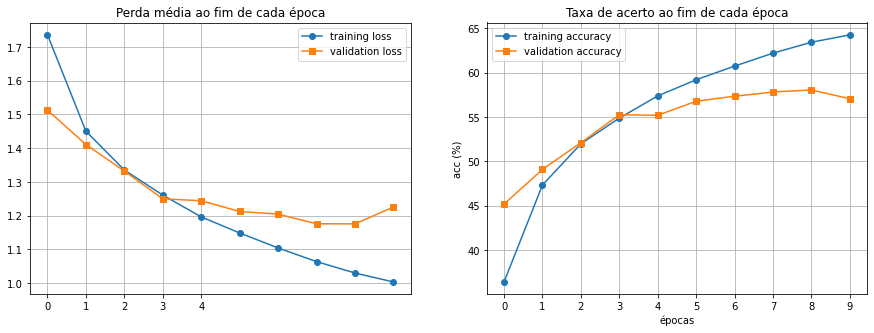

In [71]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axs[0].plot(train_losses, '-o', label='training loss')
axs[0].plot(test_losses, '-s', label='validation loss')
axs[0].set_title('Perda média ao fim de cada época')
axs[0].grid()
axs[0].set_xticks(ticks=range(5))
axs[0].legend()

axs[1].plot([100*t.data.cpu().numpy()/50000 for t in train_correct], '-o', label='training accuracy')
axs[1].plot([100*t.data.cpu().numpy()/10000 for t in test_correct], '-s' ,label='validation accuracy')
axs[1].set_title('Taxa de acerto ao fim de cada época')
axs[1].set_ylabel('acc (%)')
axs[1].set_xlabel('épocas')
axs[1].grid()
axs[1].set_xticks(ticks=range(max_epochs))
axs[1].legend();


Agora vamos avaliar o desempenho final no dataset de teste:

In [72]:
# extraindo todos os exemplos do dataset em uma única batch de tamanho m=10000
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad(): # sem gradiente
    correct = 0
    for X_test, y_test in test_load_all:
      
      if CUDA_flag: # usar GPU?
        X_test = X_test.cuda()
        y_test = y_test.cuda() 
      
      y_val = modelo(X_test)                  # previsões do modelo
      predicted = torch.argmax(y_val,dim=1)   # decisão sobre as previsões
      correct += (predicted == y_test).sum()  # calcula número de acertos

acc = correct.item()/len(test_data)         # cálcula taxa de acerto
print(f'Taxa de acerto (Accuracy) do teste: {acc:.4f} = {100*acc:3.4f}%')

Taxa de acerto (Accuracy) do teste: 0.5705 = 57.0500%


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


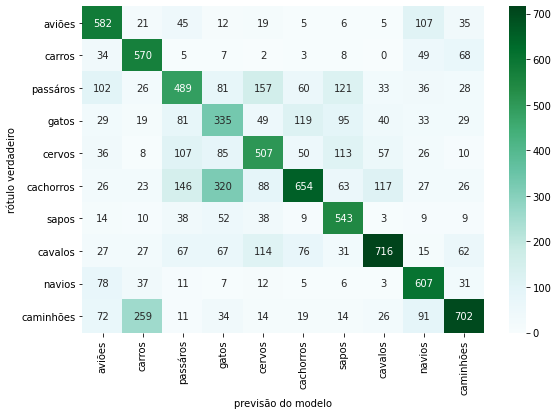

In [73]:
# imprimir uma linha de valores de referência para os índices das colunas 
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

# extrai os valores previsto/verdadeiro em formato numpy-array
y_pred_plot = predicted.view(-1).data.cpu().numpy()
y_test_plot = y_test.view(-1).data.cpu().numpy()

# calcula a matriz de confusão
matriz_de_confusao = confusion_matrix(y_pred_plot , y_test_plot)
 
# criamos um dataframe com a matriz de confusão
df_matriz_confusao = pd.DataFrame(matriz_de_confusao, cifar10_classes, cifar10_classes)

# imprime uma matriz de confusão usando um "heatmap" do pacote seaborn
import seaborn as sns

plt.figure(figsize = (9,6))
sns.heatmap(df_matriz_confusao, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("previsão do modelo")
plt.ylabel("rótulo verdadeiro")
plt.show();

Note as confusões mais comuns pela intensidade da cor verde fora da diagonal:
- cachorros (verdadeiro) classificados como gatos (previsto), $320$ erros
- caminhões (verdadeiro) classificados como carros (previsto), $259$ erros
- pássaros (verdadeiro) classificados como cervos (previsto), $157$ erros
- cachorros (verdadeiro) classificados como pássaros (previsto), $146$ erros
- pássaros (verdadeiro) classificados como sapos (previsto), $121$ erros.

_(Obs: é possível que você observe variações dos resultados em razão da ordem de execução das células e uso ou não das sementes geradoras de números aleatórios.)_

<a name="II"></a>
# Transfer Learning

Como vimos nas seções anteriores, redes convolucionais são capazes de processar imagens e aprender parâmetros para tarefas de classificação multi-classe usando redes neurais profundas (_deep learning_).  

Entretanto, também observamos alguns problemas:
- quanto maior a resolução da imagem de entrada, mais camadas serão necessárias, incluindo camadas de _downsampling_, a fim de controlar o número total de parâmetros da rede
- mesmo redes pequenas, com poucas camadas já possuem números de parâmetros na ordem de $10^5$ (cem mil parâmetros!) para imagens com resoluções baixas (testamos até $32 \times 32$ pixels)
- o treinamento é relativamente lento, mesmo usando uma GPU, e muito lento quando realizado em CPUs
- a performance final da rede depende também do tamanho do dataset: quanto maior o dataset de treino, mais chances a rede tem de otimizar seus parâmetros e generalizar a tarefa.

Portanto, para problemas complexos, com datasets muito grandes, não seria prático ficar treinando redes neurais profundas "do zero". Existem modelos pré-treinados, disponibilizado na internet por grandes empresas de tecnologia ou outros pesquisadores da área. Esses modelos já foram otimizados e treinados com muito poder computacional para tarefas específicas.  

O mais interessante é que podemos carregar um modelo pré-treinado e adaptá-lo para uma tarefa nova, mantendo alguns parâmetros fixos enquanto mudamos uma parte da rede com parâmetros novos que serão treinados para a nova tarefa. Essa técnica é chamada **_transfer learning_** (transferência de aprendizagem). Significa que realmente vamos herdar algumas camadas com _kernels_ pré-treinados, aprendidos por outro treinamento com outra tarefa, e usar esses mesmos _kernels_ em uma nova tarefa.  

É comum que se modifique os pesos das camadas densas ao final da rede profunda, mantendo os parâmetros dos _kernels_ das camadas iniciais "intactos". Isso porque as camadas convolucionais, mais próximas da entrada da rede, são responsáveis por extrair "_features_" das imagens, ou seja, as características que são importantes para o problema de classificação. Nem sempre essas _features_ são fáceis de interpretar ou tem algum significado visual, mas alguns exemplos de redes mostram a aprendizagem de padrões de contorno, textura, detecção de objetos ou partes do corpo, etc. Enquanto isso, as camadas densas do final da rede são responsáveis por processar as _features_ aprendidas e decidir sobre a classificação final.

Em resumo, de maneira geral, **as camadas (convolucionais) iniciais aprendem padrões de "baixo-nível"**, como contornos, cantos e formas. As **camadas finais da rede aprendem padrões de alto nível**, combinando as features de modo a aprender a tarefa de classificação.   

<a name="II1"></a>
## Carregando modelos pré-treinados do Torch Vision

A biblioteca ``torchvision`` traz uma série de modelos pré-treinados.  
Dentre eles, alguns dos mais clássicos são [AlexNet](https://arxiv.org/abs/1404.5997), [VGG](https://arxiv.org/abs/1409.1556) e [ResNet](https://arxiv.org/abs/1512.03385).  
Neste exemplo, vamos **carregar o modelo pré-treinado AlexNet** a partir da biblioteca ``torchvision.models``.  
Também vamos imprimir as informações das camadas do model.

In [74]:
from torchvision import models 
AlexNetModel = models.alexnet(pretrained=True)
print(AlexNetModel)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


Podemos analisar em cada camada qual é o total de parâmetros treinados.  
Note que no total, são **aproximadamente $61$ milhões de parâmetros**! 

In [75]:
total_params = 0
for name, param in AlexNetModel.named_parameters():
  n_params      = param.numel()
  total_params += n_params
  print(f'Camada {name} possui {n_params} parâmetros')
print(f'\nTotal de parâmetros: {total_params}')

Camada features.0.weight possui 23232 parâmetros
Camada features.0.bias possui 64 parâmetros
Camada features.3.weight possui 307200 parâmetros
Camada features.3.bias possui 192 parâmetros
Camada features.6.weight possui 663552 parâmetros
Camada features.6.bias possui 384 parâmetros
Camada features.8.weight possui 884736 parâmetros
Camada features.8.bias possui 256 parâmetros
Camada features.10.weight possui 589824 parâmetros
Camada features.10.bias possui 256 parâmetros
Camada classifier.1.weight possui 37748736 parâmetros
Camada classifier.1.bias possui 4096 parâmetros
Camada classifier.4.weight possui 16777216 parâmetros
Camada classifier.4.bias possui 4096 parâmetros
Camada classifier.6.weight possui 4096000 parâmetros
Camada classifier.6.bias possui 1000 parâmetros

Total de parâmetros: 61100840


Treinar uma rede desse porte exige bastante poder computacional.  
Felizmente, podemos aproveitar todas as camadas iniciais (camadas de _features_) e substituir apenas as últimas camadas classificadoras para treinar em uma nova tarefa.

<a name="II2"></a>
## Utilizando modelos pré-treinados

Antes de fazer o processo de _transfer learning_, vamos entender como utilizar o modelo AlexNet com imagens arbitrárias.  

Originalmente, a rede AlexNet foi treinada com a base de dados [ImageNet](http://www.image-net.org/), que tipicamente distingue imagens entre $\approx 1000$ categorias diferentes. As imagens de entrada da AlexNet foram pré-processadas para entrar no formato CHW de $3 \times 256 \times 256$, mas os autores realizam um corte centralizado nas imagens, deixando-as com $224 \times 224$ pixels. São imagens coloridas, em RGB, e no trabalho orignal apenas o valor médio dos pixels do dataset de entrada é removido.

Vamos carregar uma imagem da internet para processar na rede AlexNet.

In [76]:
# apenas para ler uma imagem da web usando url         
img_urls = ['https://i.cbc.ca/1.4174906.1498228319!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/beaver-close-up-teeth.jpg',
            'https://ih1.redbubble.net/image.692988112.0952/pp,550x550.u3.jpg',
            'https://i.pinimg.com/originals/ea/e0/46/eae046cfe223a062a3a09822446b0e27.png']

img_url    = img_urls[0]                                 # seleciona a imagem da lista de urls
input_img  = io.imread(img_url)                          # leitura da imagem da url
input_img  = cv2.cvtColor(input_img, cv2.COLOR_RGBA2RGB) # remove alpha channel

Dessa vez, vamos criar um _pipeline_ de transformações das imagens de entrada, usando o método ``transforms.Compose``.  
Basicamente, ele recebe uma lista com as transformações desejadas, em série.  

In [77]:
transform =  transforms.Compose([transforms.Resize(224),                         # redimensiona a dimensão menor para 224
                                 transforms.CenterCrop(224),                     # extrai um quadrado 224x224 a partir do centro da imagem
                                 transforms.ToTensor(),                          # converte a imagem para tensor
                                 transforms.Normalize([0.485, 0.456, 0.406],     # normaliza a imagem nos três canais com as médias/desvios correspondentes
                                                      [0.229, 0.224, 0.225]) ])

Como vimo anteriormente, as camadas estão divididas em dois grupos sequenciais: ``features``, que traz a extração de características das imagens com camadas convolucionais e max-pooling, e ``classifier``, que traz as camadas densas de uma rede neural artificial _feed-forward_ para a tarefa final de classificação.  

Dado um objeto de rede neural ``Modelo``, podemos acessar suas camadas usando a sintaxe ``Modelo.<nome_da_camada>`` conforme a declaração das camadas utilizada na descrição da classe desse modelo. Além disso, quando se trata de uma camada sequencial, o resultado é uma lista. Portanto, podemos usar   ``Modelo.<camada_sequencial>[i]`` para selecionar a $i$-ésima camada da sequência correspondente, $0\leq i <$``len(camada_sequencial)``.  

A seguir, vamos selecionar as três primeiras camadas da sequência de extração de fetures da AlexNet: uma camada convolucional, uma camada de ativação ReLU e uma camad _max-pooling_.

In [78]:
AlexNet_conv2d   = AlexNetModel.features[0]
AlexNet_relu     = AlexNetModel.features[1]
AlexNet_maxpol2d = AlexNetModel.features[2]
AlexNetFirstFeatures = nn.Sequential(*[AlexNet_conv2d, AlexNet_relu, AlexNet_maxpol2d])
print(AlexNetFirstFeatures)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Vamos então transformar a imagem carregada e passar ela pela primeir camada convolucional+ReLU+_max-pooling_ da AlexNet.

In [79]:
# o formato das entradas nas transformações iniciais do torch.transforms deve ser uma PIL Image
# https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-pil-image
from PIL import Image 

# converte a numpy-array para PIL image e aplica as transformações na imagem
input_img_small_tensor = transform(Image.fromarray(input_img))
input_img_small_tensor = input_img_small_tensor.view(-1,*input_img_small_tensor.shape)

# Processamento das primeiras camadas da AlexNet
first_layer = AlexNetFirstFeatures(input_img_small_tensor).detach()

Finalmente, vamos visualizar a imagem original e também um grid com todos os $64$ canais produzidos a partir dos $3$ canais de entrada da imagem original. 
Mais uma vez vamos usar o mapa de cores ``cmap=hot`` para reaçar os pixels mais ativados na saída.

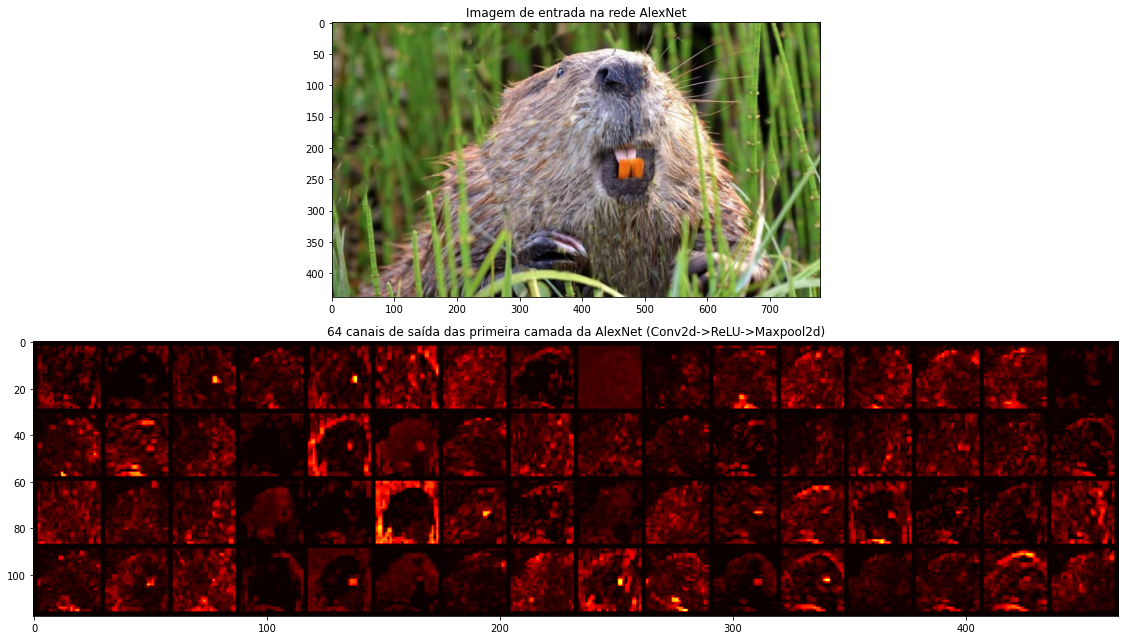

In [80]:
# mostrar a imagem original (RGB)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,9), gridspec_kw={'height_ratios': [1, 1]})
axs[0].imshow(input_img)
axs[0].set_title('Imagem de entrada na rede AlexNet')

# msotrar um grid dos 64 canais produzidos a partir dos 3 canais de entrada
tensor_batch = first_layer.view(-1, 1, *first_layer.shape[2:])
im = make_grid(tensor_batch, nrow=16)                   # gerar uma imagem em formato de grade de imagens
im_numpy = im.numpy()                                   # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))          # transpõe  as imagens de CHW para HWC (Height, Width, Color)
axs[1].imshow(im_numpy_WHC[:,:,0], cmap='hot')
axs[1].set_title('64 canais de saída das primeira camada da AlexNet (Conv2d->ReLU->Maxpool2d)')
fig.tight_layout()

A AlexNet possui $1000$ unidades na camada de saída.  
Cada unidade corresponde ao peso (uma analogia à probabilidade) com que a rede confia na classificação daquele rótulo.  
Para converter as categorias $0,1,\ldots,999$ para seus rótulos correspondentes, precisamos acessar a lista original de correspondência e criar um dicionário de "categoria para rótulo textual".  

Abaixo, acessamos uma lista disponível no repositório do usuário [yrevar](https://gist.github.com/yrevar) e criamos o dicionário correspondente usando _list-comprehension_ e alguns processamentos de _strings_.

In [81]:
import urllib, json
target_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
response = urllib.request.urlopen(target_url)
data = response.read().decode("utf-8").replace("\'",'')
idx2label = dict([tuple(x.split(': ')) for x in data[1:-1].split(',\n ')])
for i in range(10):
  print(f'categoria: {i} corresponde ao rótulo {idx2label[str(i)]}')

categoria: 0 corresponde ao rótulo tench, Tinca tinca
categoria: 1 corresponde ao rótulo goldfish, Carassius auratus
categoria: 2 corresponde ao rótulo great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
categoria: 3 corresponde ao rótulo tiger shark, Galeocerdo cuvieri
categoria: 4 corresponde ao rótulo hammerhead, hammerhead shark
categoria: 5 corresponde ao rótulo electric ray, crampfish, numbfish, torpedo
categoria: 6 corresponde ao rótulo stingray
categoria: 7 corresponde ao rótulo cock
categoria: 8 corresponde ao rótulo hen
categoria: 9 corresponde ao rótulo ostrich, Struthio camelus


Usando o dicionário, e com a imagem de entrada transformada, podemos simplesmente usar a rede AlexNet e processar completamente a imagem para obter a classifciação de saída.

In [82]:
saida_alexnet = AlexNetModel(input_img_small_tensor)
id_predicted = torch.argmax(saida_alexnet, dim=1).item()
print(f' # shape da saída: {saida_alexnet.shape}')
print(f' # soma de todos valores de saída {saida_alexnet.sum()}')
print(f' # Categoria com maior probabulidade: {id_predicted}')
print(f' # Rótulo correspondente: {idx2label[str(id_predicted)]}')

 # shape da saída: torch.Size([1, 1000])
 # soma de todos valores de saída -3.338901996612549
 # Categoria com maior probabulidade: 337
 # Rótulo correspondente: beaver


<a name="II3"></a>
## Modificando Modelos Pré-Treinados para usar Transfer Learning

Para demonstrar o uso da técnica de transfer-learnig, vamos adaptar o modelo AlexNet para classificar apenas $10$ categorias de imagens, retreinando as camadas de classificação com o dataset ``STL10`` de ``torchvision.datasets``. Esse dataset é muito semelhante ao CIFAR-10, exceto por algumas categorias, e suas imagens são coloridas, com formato $96\times 96$ pixels.

In [83]:
STL10_classes = ['aviões', 'passáros', 'carros', 'gatos', 'cervos', 'cachorros', 'cavalos', 'macacos', 'navios', 'caminhões']
for i, c in enumerate(STL10_classes):
  print(f'Classe {i}: {c}.')

Classe 0: aviões.
Classe 1: passáros.
Classe 2: carros.
Classe 3: gatos.
Classe 4: cervos.
Classe 5: cachorros.
Classe 6: cavalos.
Classe 7: macacos.
Classe 8: navios.
Classe 9: caminhões.


Como as imagens são quadradas e de baixa resolução, não é necessário realizar a transformação ``CenterCrop``, pois ``Resize`` já fará um "_up-sampling_" das imagens de $96\times 96$ para $224\times 224$ pixels.  

A seguir, criamos a composição de transformações e carregamos os datasets correspondentes. Note que o parâmetro de entrada ``split='train'`` substitui o parâmetro ``train=True`` do CIFAR-10 (muitos datasets do ``torchvision`` apresentam diferenças entre si).  

O datase de treino posui $5000$ imagens, enquanto o dataset de teste possui $8000$.

In [84]:
transform =  transforms.Compose([transforms.Resize(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406],
                                                      [0.229, 0.224, 0.225]) ])

train_data = datasets.STL10(root='./TV_Data', split="train", download=True, transform=transform)
test_data  = datasets.STL10(root='./TV_Data', split='test', download=True, transform=transform)

print('Treino:', train_data,'\n')
print('Teste:', test_data)

Extracting ./TV_Data/stl10_binary.tar.gz to ./TV_Data
Files already downloaded and verified
Treino: Dataset STL10
    Number of datapoints: 5000
    Root location: ./TV_Data
    Split: train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ) 

Teste: Dataset STL10
    Number of datapoints: 8000
    Root location: ./TV_Data
    Split: test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


Novamente, criamos um ``DataLoader`` para extrair as _batches_ do dataset.  
A seguir, também vamos imprimir a primeira _batch_, para visualização. 

In [85]:
torch.manual_seed(101)  # para reproducibilidade
batch_size = 25
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'> float32
macacos   passáros  carros    cervos    cervos    
carros    passáros  cachorros navios    passáros  
navios    cervos    navios    passáros  cervos    
macacos   passáros  cavalos   cervos    passáros  
passáros  navios    navios    carros    aviões    


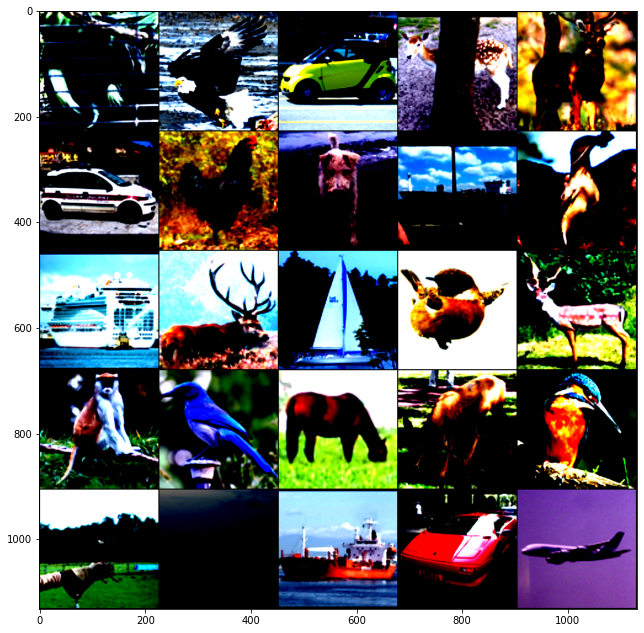

In [86]:
for images, labels in train_loader: # primeira uma batch de 25 exemplos do STL10
  break

# grid de uma batch de 25 exemplos do STL10
im = make_grid(images, nrow=5)                   # gerar uma imagem em formato de grade de imagens
im_numpy = im.numpy()                            # converter tensor para numpy
im_numpy_WHC = np.transpose(im_numpy, (1,2,0))   # transpõe  as imagens de CHW para HWC (Height, Width, Color)

print(type(im_numpy_WHC),im_numpy_WHC.dtype)
plt.figure(figsize=(11,11))
plt.imshow(im_numpy_WHC)                         # imprime as primeiras imagens carregadas

# imprime os rótulos da imagem em formato de grade
labels_str    = [STL10_classes[i] for i in labels]
grouped_words = [labels_str[i:i+5] for i in range(0, len(labels_str), 5)]
for grupo in grouped_words:
  print("".join("{:<10}".format(item) for item in grupo))

Agora, vamos realizar **uma das partes mais importantes do processo de _transfer learning_ com PyTorch**.  

Precisamos indicar no modelo quais parâmetros ficarão "estáticos", "congelados", ou seja, que não serão treinados novamente.  

Para isso, vamos **iterar sobre todos os parâmetros do modelo e modificar o atributo ``requires_grad`` para ``False``**.  

Isso faz com que o algoritmo de _backpropagation_ ignore as camadas que não precisam ser retreinadas.

In [87]:
for param in AlexNetModel.parameters():
    param.requires_grad = False

A segunda parte importante do processo de _transfer learning_ é **substituir as camadas finais (pré-treinadas) por novas camadas de parâmetros**, neste caso inicializadas com valores aleatóios.  
Essa será a parte da rede que será re-treinada para a nova tarefa e classificação.  
Note que na camada de saída, agora temos apenas $10$ unidades, em vez de $1000$ da rede original. 

In [88]:
torch.manual_seed(100)
new_classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 10),
                                 nn.LogSoftmax(dim=1))

Para substituir, vamos sobrescrever toda a camada sequencial ``classifier`` da AlexNet original com a nova camada criada na célula anterior. 

In [89]:
AlexNetModel.classifier = new_classifier
print(AlexNetModel)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

Abaixo, vamos enumerar apenas as camadas treináveis, mostrando também o total correspondente de parâmetros.  
Note que agora temos "apenas" $9,4$ milhões de parâmetros para treinar, sendo que AlexNet original tem $61$ milhões de parâmetros.   
Ou seja, estamos **"transferindo o conhecimento" de $51,6$ milhões de parâmetros de extração de features pré-treinados**.

In [90]:
total_params = 0
for name, param in AlexNetModel.named_parameters():
  if param.requires_grad:
    n_params = param.numel()
    total_params += n_params
    print(f'Camada {name} possui {n_params} parâmetros treináveis')
print(f'Total de parâmetros treináveis: {total_params}')

Camada classifier.0.weight possui 9437184 parâmetros treináveis
Camada classifier.0.bias possui 1024 parâmetros treináveis
Camada classifier.3.weight possui 10240 parâmetros treináveis
Camada classifier.3.bias possui 10 parâmetros treináveis
Total de parâmetros treináveis: 9448458


A seguir, vamos escolher o critério de otimização, a regra de atualização dos prâmetros e repetir os códigos de treinamento (é uma repetição do código do CIFAR-10, substituindo modelo pelo ``AlexNetModel``.

In [91]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(AlexNetModel.classifier.parameters(), lr=0.001)

Note também que o tamanho das amostras ``batch_size=25`` no STL10 vai gerar:
- $200$ iterações em $1$ época de treino e 
- $320$ iterações em $1$ época de teste.

Portanto, também alteramos esses valores para cálculo da média das perdas e taxa de acerto, em relação ao CIFAR-10.

In [92]:
if CUDA_flag:                 # se houver GPUs disponíveis
  AlexNetModel.cuda()               # converte o modelo para CUDA

max_epochs = 10 # número de vezes que percorremos o dataset por completo

# "trackers"
train_losses  = [] # cada elemento é a soma das perdas médias das batches de cada época (treino)
test_losses   = [] # cada elemento é a soma das perdas médias das batches de cada época (teste)
train_correct = [] # total de acertos de cada época (treino)
test_correct  = [] # total de acertos de cada época (teste)


# training loop
for i in range(max_epochs): # para cada época

  # inicialização de acumuladores
  trn_correct  = 0
  tst_correct  = 0
  loss_val_trn = 0
  loss_val_tst = 0

  # Training batches
  for b, (X_train, Y_train) in enumerate(train_loader): # para cada batch numerada do gerador
    
    if CUDA_flag: # usar GPU?
      X_train = X_train.cuda()
      Y_train = Y_train.cuda()
    # aplica as entradas no modelo e obtém a previsão de saída
    y_pred = AlexNetModel(X_train)
    
    # calcula a perda comparando a saída com os rótulos verdadeiros
    loss   = criterion (y_pred, Y_train)
    loss_val_trn += loss.item()/200     # salva o valor da perda média dessa batch

    # faz as medições de taxa de acerto (acc)
    predicted  = torch.argmax(y_pred.data, dim=1)    # índices das saídas de cada exemplo com maior confiança
    batch_corr = (predicted == Y_train).sum() # compara os rótulos com as decisões e soma o vetor booleano (True: 1, False: 0) 
    trn_correct  += batch_corr                       # acumula o número de acertos da batch atual

    # Atualização dos parâmetros do Modelo
    optimizer.zero_grad()     # inicializa os gradientes
    loss.backward()           # backpropagation
    optimizer.step()          # atualização dos parâmetros com a learning-rate e gradientes

    
    # imprime o status
    if b%50 ==0:
      print(f' epoch {i} batch {b} LOSS: {loss.item()} ')

  # salva as variáveis de perda/acc nas listas correspondentes (trackers)
  train_losses.append(loss_val_trn)
  train_correct.append(trn_correct)
    
  # Realizando o Teste do Modelo em paralelo com o treino
  with torch.no_grad(): # sem cálculo de gradientes (parâmetros fixos)
    for b, (X_test, Y_test) in enumerate(test_loader): # para cada batch numerada
      
      if CUDA_flag: # usar GPU?
        X_test = X_test.cuda() 
        Y_test = Y_test.cuda()
      # aplica o modelo na batch de teste    
      y_val = AlexNetModel(X_test)

      # cálculo da perda
      loss = criterion(y_val, Y_test)
      loss_val_tst += loss.item()/320

      # estima os rótulos de saída usando argmax da log_softmax
      predicted = torch.argmax(y_val.data,dim=1)          #  índice do elemento com maior confiança na saída de cada exemplo
      tst_correct += (predicted == Y_test).sum()   #  compara previsão com rótulos verdadeiros e soma os acertos

    # salva as variáveis de perda/acc nas listas correspondentes (trackers)
    test_losses.append(loss_val_tst)
    test_correct.append(tst_correct)

print('\n# finished training!')

 epoch 0 batch 0 LOSS: 2.4741365909576416 
 epoch 0 batch 50 LOSS: 1.6692924499511719 
 epoch 0 batch 100 LOSS: 0.7577778100967407 
 epoch 0 batch 150 LOSS: 0.4642402231693268 
 epoch 1 batch 0 LOSS: 0.25334131717681885 
 epoch 1 batch 50 LOSS: 0.15898531675338745 
 epoch 1 batch 100 LOSS: 0.45283639430999756 
 epoch 1 batch 150 LOSS: 0.46943581104278564 
 epoch 2 batch 0 LOSS: 0.22411419451236725 
 epoch 2 batch 50 LOSS: 0.0511435903608799 
 epoch 2 batch 100 LOSS: 0.11024434864521027 
 epoch 2 batch 150 LOSS: 0.12307021766901016 
 epoch 3 batch 0 LOSS: 0.27000436186790466 
 epoch 3 batch 50 LOSS: 0.06359431147575378 
 epoch 3 batch 100 LOSS: 0.07817015051841736 
 epoch 3 batch 150 LOSS: 0.003902625059708953 
 epoch 4 batch 0 LOSS: 0.0995098426938057 
 epoch 4 batch 50 LOSS: 0.0013657137751579285 
 epoch 4 batch 100 LOSS: 0.15278282761573792 
 epoch 4 batch 150 LOSS: 0.1641443371772766 
 epoch 5 batch 0 LOSS: 0.14249224960803986 
 epoch 5 batch 50 LOSS: 0.010168137960135937 
 epoch 5 

Após o treino, vamos visualizar a evolução da perda média e da taxa de acerto em cada época.

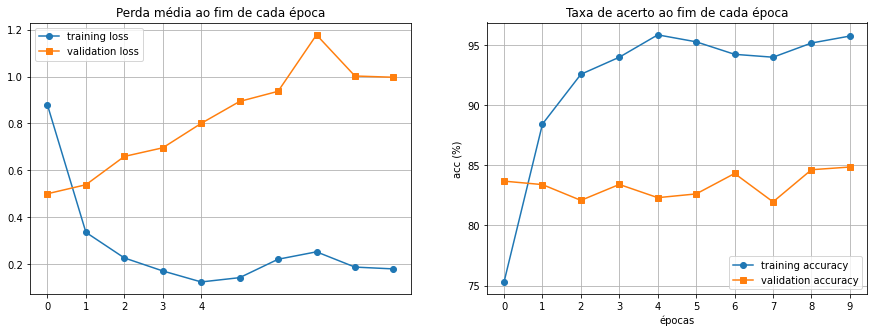

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axs[0].plot(train_losses, '-o', label='training loss')
axs[0].plot(test_losses, '-s', label='validation loss')
axs[0].set_title('Perda média ao fim de cada época')
axs[0].grid()
axs[0].set_xticks(ticks=range(5))
axs[0].legend()

axs[1].plot([100*t.data.cpu().numpy()/5000 for t in train_correct], '-o', label='training accuracy')
axs[1].plot([100*t.data.cpu().numpy()/8000 for t in test_correct], '-s' ,label='validation accuracy')
axs[1].set_title('Taxa de acerto ao fim de cada época')
axs[1].set_ylabel('acc (%)')
axs[1].set_xlabel('épocas')
axs[1].grid()
axs[1].set_xticks(ticks=range(max_epochs))
axs[1].legend();


Vamos aplicar o modelo treinado novamente sobre todo dataset de teste e calcular a taxa de acerto final .

In [94]:
# extraindo todos os exemplos do dataset em uma única batch de tamanho m=10000
test_load_many = DataLoader(test_data, batch_size=1000, shuffle=False)

with torch.no_grad(): # sem gradiente
    correct = 0
    for X_test, y_test in test_load_many:
      
      if CUDA_flag: # usar GPU?
        X_test = X_test.cuda()
        y_test = y_test.cuda() 
      
      y_val = AlexNetModel(X_test)                  # previsões do modelo
      predicted = torch.argmax(y_val,dim=1)   # decisão sobre as previsões
      correct += (predicted == y_test).sum()  # calcula número de acertos

acc = correct.item()/len(test_data)         # cálcula taxa de acerto
print(f'Taxa de acerto (Accuracy) do teste: {acc:.4f} = {100*acc:3.4f}%')

Taxa de acerto (Accuracy) do teste: 0.8482 = 84.8250%


E por fim, analisamos a matriz de confusão para comprrender onde ocorre a maior parte dos erros de classificação: 

- caminhões (verdadeiro) classificados como navios (previsto), $12$ erros,
- macacos (verdadeiro) classificados como gatos (previsto), $12$ erros,
- gatos (verdadeiro) classificados como cachorros (previsto), $9$ erros,
- cachorros (verdadeiro) classificados como gatos (previsto), $9$ erros.

_(Obs: é possível que você observe variações dos resultados em razão da ordem de execução das células e uso ou não das sementes geradoras de números aleatórios.)_

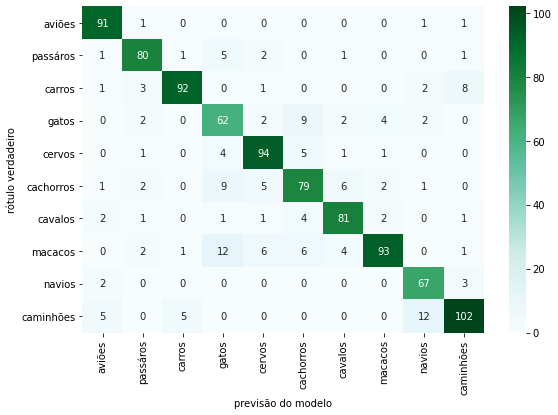

In [95]:
# imprimir uma linha de valores de referência para os índices das colunas 
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

# extrai os valores previsto/verdadeiro em formato numpy-array
y_pred_plot = predicted.view(-1).data.cpu().numpy()
y_test_plot = y_test.view(-1).data.cpu().numpy()

# calcula a matriz de confusão
matriz_de_confusao = confusion_matrix(y_pred_plot , y_test_plot)
 
# criamos um dataframe com a matriz de confusão
df_matriz_confusao = pd.DataFrame(matriz_de_confusao, STL10_classes, STL10_classes)

# imprime uma matriz de confusão usando um "heatmap" do pacote seaborn
import seaborn as sns

plt.figure(figsize = (9,6))
sns.heatmap(df_matriz_confusao, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("previsão do modelo")
plt.ylabel("rótulo verdadeiro")
plt.show();

<a name="Bonus"></a>
# Bônus: por que não fazer _deep learning_ em imagens apenas com camadas densas?

Considere as imagens da AlexNet, que possuem formato $224 \times 224 \times 3$ pixels.  

Suponha que em vez de utilizarmos redes convolucionais e _max-pooling_, vamos **vetorizar a imagem inteira** e usar uma única camada densa (um parâmetro diferente para cada conexão de um pixel de entrada com cada unidade de saída), conectando-a diretamente às $10$ unidades de saída (ou seja, poucas categorias para classificar).  

Veja primeiramente o tamanho do vetor de entrada:

In [96]:
img_dummy = torch.zeros(size=(224,224,3)) # máscara da imagem de entrada
print(img_dummy.shape)

torch.Size([224, 224, 3])


In [97]:
img_dummy_vetor = img_dummy.flatten()     # vetoriza a imagem
print(img_dummy_vetor.shape)

torch.Size([150528])


Ou seja, temos mais de $150$ mil pixels de entrada.  
Com uma única camada densa de $10$ unidades de saída, serão necesários 
$150528 \times 10\approx 1{,}5$  milhões de parâmetros treináveis.

É claro que, em comparação com a AlexNet original, ainda parece pouco.  
Entretanto, o desempenho de uma única camada de classificação será muito pobre em relação à classificação da AlexNet.  
Em _deep learning_, muitas vezes é preciso ter uma profundidade da rede, em número de camadas, par melhoraro desempenho.  

Suponha que usemos então toda camada classificadora da AlexNet diretamete na imagem de entrada vetorizada:
- $150528 \times 4096$
- $4096 \times 4096$ 
- $4096\times 10$  

resulta num total de **mais de $633$ milhões de parâmetros**, sendo $616$ milhões apenas na primeira camada! (_Obs: desprezei os termos de _bias.__)
Em termos de variáveis de $32$ bits, isso ocuparia algo próximo de $2{,}36$ GB de memória.  
Já os parâmetros da AlexNet ocupariam apenas $233.08$ MB.

Se você tiver condições (GPUs, memória e tempo!), monte sua própria rede densa e compare o desempenho com a AlexNet, tanto em taxa de acerto na classificação quanto em tempo de treino e processamento das _batches_.  

De qualquer forma, espero que esse argumento ilustre um pouco das vantagens do uso de redes convolucionais no processamento de imagens. :)